#### *This notebook deals entirely with data understanding and cleaning of the four datasets used in the analysis of chikungunya virus*

The four datasets are;
- Chikungunya linelist July 2025
- Chikungunya fever data
- KHIS data fever county
- KHIS data fever

#### *1.Chikungunya linelist July 2025*

In [1]:
import pandas as pd
import os
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from datetime import datetime, timedelta
import datetime as dt
import geopandas as gpd

In [2]:

print(os.getcwd())

/Users/jemutai/Downloads/chikungunya


In [3]:
os.chdir('/Users/jemutai/Downloads/chikungunya')

In [ ]:
chicks =pd.read_excel('Chikungunya linelistJuly_2025.xlsx')



,Column1,In patienT/Outpatient,County,Sub County,Ward,Village or Town and Neighbourhood INDICATE major landmarks,Health facility,Sex,Age(years),Age in Months,...,Other confirmed diagnosis Specify,Confirmation date,Dead/Alive,Dead,Date of Death,Comments,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,1.0,inpatient,Mombasa,Likoni,Timbwani,PUNGU VILLA,Shelly beach hospital,Female,40.0,NaN,...,Dengue rdt,"JUNE 2, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,inpatient,Mombasa,Likoni,Timbwani,LAKERS,Shelly beach hospital,Male,46.0,NaN,...,Dengue rdt,"JUNE 2, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,inpatient,Mombasa,Likoni,Timbwani,Mtaa wa makkah,Shelly beach hospital,Male,33.0,NaN,...,Dengue rdt,"JUNE 2, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,inpatient,Mombasa,Likoni,Timbwani,LICODEP,Shelly beach hospital,Female,19.0,NaN,...,Dengue rdt,"JUNE 2, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,outpatient,Mombasa,Likoni,Timbwani,TIMBWANI,Shelly beach hospital,Male,37.0,NaN,...,Dengue rdt,"JUNE 2, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
chicks.head(10)

,Column1,In patienT/Outpatient,County,Sub County,Ward,Village or Town and Neighbourhood INDICATE major landmarks,Health facility,Sex,Age(years),Age in Months,...,Other confirmed diagnosis Specify,Confirmation date,Dead/Alive,Dead,Date of Death,Comments,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,1.0,inpatient,Mombasa,Likoni,Timbwani,PUNGU VILLA,Shelly beach hospital,Female,40.0,NaN,...,Dengue rdt,"JUNE 2, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,inpatient,Mombasa,Likoni,Timbwani,LAKERS,Shelly beach hospital,Male,46.0,NaN,...,Dengue rdt,"JUNE 2, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,inpatient,Mombasa,Likoni,Timbwani,Mtaa wa makkah,Shelly beach hospital,Male,33.0,NaN,...,Dengue rdt,"JUNE 2, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,inpatient,Mombasa,Likoni,Timbwani,LICODEP,Shelly beach hospital,Female,19.0,NaN,...,Dengue rdt,"JUNE 2, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,outpatient,Mombasa,Likoni,Timbwani,TIMBWANI,Shelly beach hospital,Male,37.0,NaN,...,Dengue rdt,"JUNE 2, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,outpatient,Mombasa,Likoni,Timbwani,VANGA ESTATE,Shelly beach hospital,Male,28.0,NaN,...,Dengue rdt,"JUNE 2, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,outpatient,Mombasa,Likoni,Timbwani,VANGA ESTATE,Shelly beach hospital,Male,29.0,NaN,...,Dengue rdt,"JUNE 2, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,inpatient,Mombasa,Likoni,Timbwani,USHINDI,Shelly beach hospital,Female,27.0,NaN,...,Dengue rdt,"JUNE 2, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,inpatient,Mombasa,Likoni,Timbwani,OFISI YA JARA,Shelly beach hospital,Female,33.0,NaN,...,Dengue rdt,"JUNE 2, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,outpatient,Mombasa,Likoni,Timbwani,VANGA ESTATE,Shelly beach hospital,Female,28.0,NaN,...,Dengue rdt,"JUNE 3, 2025",Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
chicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 42 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Column1                                                     613 non-null    float64
 1   In patienT/Outpatient                                       438 non-null    object 
 2   County                                                      613 non-null    object 
 3   Sub County                                                  609 non-null    object 
 4   Ward                                                        462 non-null    object 
 5   Village or Town and Neighbourhood INDICATE major landmarks  536 non-null    object 
 6   Health facility                                             597 non-null    object 
 7   Sex                                                         569 non-null    object 
 8   

In [5]:
chicks.shape

(614, 42)

In [6]:
chicks.columns

Index(['Column1', 'In patienT/Outpatient', 'County', 'Sub County', 'Ward',
       'Village or Town and Neighbourhood INDICATE major landmarks',
       'Health facility', 'Sex', 'Age(years)', 'Age in Months',
       'Date seen (ddmmyyyy)', 'Date of onset of illness (ddmmyyyy)',
       'Signs and Symptoms(yes/No)', 'Fever(Yes/No)', 'Rash(Yes/No)',
       'Pain behind the eyes(Yes/No)', 'Vomiting(Yes/No)', 'Headache(Yes/No)',
       'Joint pains/arthritis(yes/no)', 'Rapid breathing(Yes/No)',
       'Nausea(Yes/No)', 'swollen glands(Yes/No)', 'severe abdominal(Yes/No)',
       'Chills(YES/N0)', 'Other symptoms. Specify',
       'Was the patient a referal(Yes/No)', 'Specimen taken(Yes/No)',
       'Date specimen taken', 'Type of specimen(Blood/stool)',
       'Confirmed(Positive/Negative/Pending)', 'PCR Positive',
       'Disease Lab confirmed', 'Other confirmed diagnosis Specify',
       'Confirmation date ', 'Dead/Alive', 'Dead', 'Date of Death', 'Comments',
       'Unnamed: 38', 'Unnamed

In [7]:
chicks['PCR Positive'].value_counts()

PCR Positive
Positive    101
Negative      3
Name: count, dtype: int64

In [16]:
chicks['Confirmed(Positive/Negative/Pending)'].value_counts()

Confirmed(Positive/Negative/Pending)
Positive     96
positive     91
Negative     21
Pending      14
positive      9
No result     6
POSITIVE      6
No sample     2
Name: count, dtype: int64

In [17]:
# Standardize the Confirmed results column
chicks['Confirmed(Positive/Negative/Pending)'] = (
    chicks['Confirmed(Positive/Negative/Pending)']
    .str.strip()  # remove leading/trailing spaces
    .str.lower()  # make everything lowercase
    .replace({
        'positive': 'Positive',
        'pos': 'Positive',
        'negative': 'Negative',
        'neg': 'Negative',
        'pending': 'Pending',
        'no result': 'No Result',
        'no sample': 'No Result'
    })
)

# Capitalize the first letter (for nice display)
chicks['Confirmed(Positive/Negative/Pending)'] = chicks['Confirmed(Positive/Negative/Pending)'].str.title()

# Check standardized results
print(chicks['Confirmed(Positive/Negative/Pending)'].value_counts(dropna=False))


Confirmed(Positive/Negative/Pending)
NaN          369
Positive     202
Negative      21
Pending       14
No Result      8
Name: count, dtype: int64


In [18]:
# Count the values
counts = chicks['Confirmed(Positive/Negative/Pending)'].value_counts(dropna=False)

# Calculate proportions (%)
proportions = (counts / counts.sum()) * 100

# Combine into a single summary table
confirmation_summary = pd.DataFrame({
    'Count': counts,
    'Proportion (%)': proportions.round(2)
})

print(confirmation_summary)


                                      Count  Proportion (%)
Confirmed(Positive/Negative/Pending)                       
NaN                                     369           60.10
Positive                                202           32.90
Negative                                 21            3.42
Pending                                  14            2.28
No Result                                 8            1.30


In [19]:
chicks['Date of onset of illness (ddmmyyyy)'].value_counts()

Date of onset of illness (ddmmyyyy)
2025-06-16 00:00:00    11
19/5/2025              10
18/5/2025               9
2025-06-13 00:00:00     7
2025-06-08 00:00:00     7
                       ..
6/6/2025                1
31/5/2025               1
11/6/2025               1
10/6/2025               1
2025-06-28 00:00:00     1
Name: count, Length: 82, dtype: int64

In [20]:
chicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 42 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Column1                                                     613 non-null    float64
 1   In patienT/Outpatient                                       438 non-null    object 
 2   County                                                      613 non-null    object 
 3   Sub County                                                  609 non-null    object 
 4   Ward                                                        462 non-null    object 
 5   Village or Town and Neighbourhood INDICATE major landmarks  536 non-null    object 
 6   Health facility                                             597 non-null    object 
 7   Sex                                                         569 non-null    object 
 8   

In [21]:
# Convert to datetime (dayfirst=True since your format is ddmmyyyy)
chicks['Date seen (ddmmyyyy)'] = pd.to_datetime(
    chicks['Date seen (ddmmyyyy)'],
    errors='coerce', 
    dayfirst=True
)

# Get earliest and latest dates
earliest = chicks['Date seen (ddmmyyyy)'].min()
latest = chicks['Date seen (ddmmyyyy)'].max()

print(f"Earliest onset date: {earliest.strftime('%Y-%m-%d')}")
print(f"Latest onset date: {latest.strftime('%Y-%m-%d')}")


Earliest onset date: 2025-03-14
Latest onset date: 2025-06-29


In [22]:
chicks['Date of onset of illness (ddmmyyyy)'].unique()

array([nan, datetime.datetime(2025, 5, 16, 0, 0),
       datetime.datetime(2025, 5, 14, 0, 0),
       datetime.datetime(2025, 5, 10, 0, 0),
       datetime.datetime(2025, 5, 13, 0, 0),
       datetime.datetime(2025, 5, 11, 0, 0), '13/05', '09/05',
       datetime.datetime(2025, 6, 3, 0, 0),
       datetime.datetime(2025, 6, 4, 0, 0),
       datetime.datetime(2025, 6, 5, 0, 0),
       datetime.datetime(2025, 6, 6, 0, 0),
       datetime.datetime(2025, 6, 7, 0, 0), '1.5.2025', '9.5.2025',
       '11.5.2025', '13.5.2025', '12.5.2025', '18.5.2025', '16.5.2025',
       '14.5.2025', '16/5/2025', '18/5/2025', '19/5/2025', '17/5/2025',
       '20/5/2025', '22/5/2025', '21/5/2025', '9.6.2025', '27/5/2025',
       '28/5/2025', '23/5/2025', datetime.datetime(2025, 5, 6, 0, 0),
       datetime.datetime(2025, 4, 6, 0, 0),
       datetime.datetime(2025, 3, 6, 0, 0),
       datetime.datetime(2025, 2, 6, 0, 0),
       datetime.datetime(2025, 1, 6, 0, 0), '30/5/2025', 45812, 45813,
       45814, dateti

In [23]:


def clean_date(val):
    if pd.isna(val):
        return np.nan

    # Already a datetime
    if isinstance(val, (pd.Timestamp, datetime)):
        return val

    # Excel serial number (roughly days since 1899-12-30)
    if isinstance(val, (int, float)) and 30000 < val < 50000:
        return datetime(1899, 12, 30) + timedelta(days=int(val))

    # Remove ordinal suffixes like '7th', '8th', etc.
    if isinstance(val, str):
        val = val.strip()
        val = re.sub(r'(\d+)(st|nd|rd|th)', r'\1', val)

        # Replace '.' with '/' to unify separators
        val = val.replace('.', '/')

        # Try different date parsing attempts
        for fmt in [
            '%d/%m/%Y', '%d/%m/%y',  # full or short year
            '%d/%m',                 # missing year → assume current year
            '%d %B %Y', '%d %b %Y',  # e.g. "7 June 2025"
            '%d %B', '%d %b'         # e.g. "7 June"
        ]:
            try:
                dt = datetime.strptime(val, fmt)
                # If no year provided, assume 2025
                if dt.year == 1900:
                    dt = dt.replace(year=2025)
                return dt
            except ValueError:
                continue

    return np.nan  # fallback if none matched

# Apply the cleaning function
chicks['Date_clean'] = chicks['Date of onset of illness (ddmmyyyy)'].apply(clean_date)

# Optional: check results
print(chicks['Date_clean'].unique()[:10])


<DatetimeArray>
[                'NaT', '2025-05-16 00:00:00', '2025-05-14 00:00:00',
 '2025-05-10 00:00:00', '2025-05-13 00:00:00', '2025-05-11 00:00:00',
 '2025-05-09 00:00:00', '2025-06-03 00:00:00', '2025-06-04 00:00:00',
 '2025-06-05 00:00:00']
Length: 10, dtype: datetime64[ns]


In [24]:
# Convert to datetime (dayfirst=True since your format is ddmmyyyy)
#chicks['Date of onset of illness (ddmmyyyy)'] = pd.to_datetime(
    #chicks['Date of onset of illness (ddmmyyyy)'],
    #errors='coerce', 
    #dayfirst=True
#)

# Get earliest and latest dates
earliest = chicks['Date_clean'].min()
latest = chicks['Date_clean'].max()

print(f"Earliest onset date: {earliest.strftime('%Y-%m-%d')}")
print(f"Latest onset date: {latest.strftime('%Y-%m-%d')}")


Earliest onset date: 2025-01-06
Latest onset date: 2025-06-28


In [25]:
chicks = chicks[chicks['Date_clean'] > '2000-01-01']


In [26]:
chicks['Date_clean'].unique()

<DatetimeArray>
['2025-05-16 00:00:00', '2025-05-14 00:00:00', '2025-05-10 00:00:00',
 '2025-05-13 00:00:00', '2025-05-11 00:00:00', '2025-05-09 00:00:00',
 '2025-06-03 00:00:00', '2025-06-04 00:00:00', '2025-06-05 00:00:00',
 '2025-06-06 00:00:00', '2025-06-07 00:00:00', '2025-05-01 00:00:00',
 '2025-05-12 00:00:00', '2025-05-18 00:00:00', '2025-05-19 00:00:00',
 '2025-05-17 00:00:00', '2025-05-20 00:00:00', '2025-05-22 00:00:00',
 '2025-05-21 00:00:00', '2025-06-09 00:00:00', '2025-05-27 00:00:00',
 '2025-05-28 00:00:00', '2025-05-23 00:00:00', '2025-05-06 00:00:00',
 '2025-04-06 00:00:00', '2025-03-06 00:00:00', '2025-02-06 00:00:00',
 '2025-01-06 00:00:00', '2025-05-30 00:00:00', '2025-06-01 00:00:00',
 '2025-06-02 00:00:00', '2025-06-08 00:00:00', '2025-05-31 00:00:00',
 '2025-06-11 00:00:00', '2025-06-10 00:00:00', '2025-06-12 00:00:00',
 '2025-06-13 00:00:00', '2025-05-29 00:00:00', '2025-06-14 00:00:00',
 '2025-06-15 00:00:00', '2025-06-16 00:00:00', '2025-06-18 00:00:00',
 '20

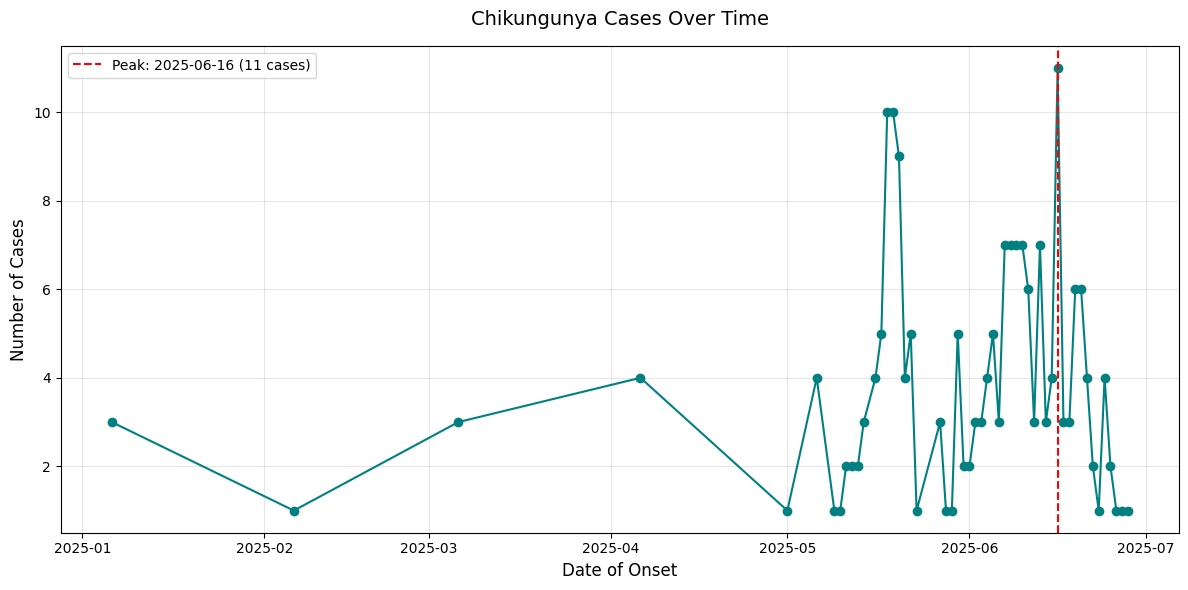

Peak date: 2025-06-16 with 11 cases.


In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1: Convert to datetime ---
chicks['Date of onset of illness (ddmmyyyy)'] = pd.to_datetime(
    chicks['Date of onset of illness (ddmmyyyy)'],
    errors='coerce',
    dayfirst=True
)

# --- Step 2: Remove invalid (1970) or missing dates ---
chicks = chicks[chicks['Date of onset of illness (ddmmyyyy)'].notna()]
chicks = chicks[chicks['Date of onset of illness (ddmmyyyy)'] > '1971-01-01']

# --- Step 3: Count cases per day ---
daily_cases = (
    chicks['Date of onset of illness (ddmmyyyy)']
    .value_counts()
    .sort_index()
)

# --- Step 4: Plot epidemic curve ---
plt.figure(figsize=(12, 6))
plt.plot(daily_cases.index, daily_cases.values, marker='o', linestyle='-', color='teal')
plt.title('Chikungunya Cases Over Time', fontsize=14, pad=15)
plt.xlabel('Date of Onset', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# --- Step 5: Highlight the peak ---
peak_date = daily_cases.idxmax()
peak_value = daily_cases.max()
plt.axvline(peak_date, color='red', linestyle='--', label=f'Peak: {peak_date.date()} ({peak_value} cases)')
plt.legend()

plt.show()

print(f"Peak date: {peak_date.date()} with {peak_value} cases.")


In [28]:
chicks['Date seen (ddmmyyyy)'].dtype

dtype('<M8[ns]')

### 1. Let us deal with age distribution by symptoms 

In [29]:
chicks['Age in Months'].unique()

array([nan, 0, 96, 30, 109, 265, 168, 720, 240, 6], dtype=object)

In [30]:
chicks['Age in Months'] = pd.to_numeric(chicks['Age in Months'], errors='coerce')
# Convert to numeric and clean up
chicks['Age(years)'] = pd.to_numeric(chicks['Age(years)'], errors='coerce')

In [31]:
chicks['Age in Months'].value_counts()

Age in Months
0.0      12
96.0      2
109.0     2
30.0      1
265.0     1
168.0     1
720.0     1
240.0     1
6.0       1
Name: count, dtype: int64

In [32]:
## Identify infants
infants = chicks[chicks['Age in Months'] == 0.0]
infants.shape

(12, 43)

In [33]:
chicks['Age(years)'].unique()

array([20. , 23. , 39. , 46. , 25. , 21. , 65. , 19. , 33. , 43. , 56. ,
       27. , 10. , 16. , 52. , 45. , 48. , 26. , 31. , 38. , 12. ,  8. ,
        5. , 30. , 35. ,  9. , 22. , 14. , 68. , 70. , 40. , 36. ,  nan,
       34. , 67. ,  1. , 49. , 32. , 11. , 63. , 15. , 41. , 47. , 58. ,
       80. , 24. ,  6. , 42. , 28. ,  4. ,  7.5, 17. , 13. , 50. ,  3. ,
       37. , 18. , 51. , 55. , 44. , 60. ,  2. ,  7. , 53. ])

For older individuals, create age groups 

In [34]:
bins = [0, 1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 120]
labels = ['<1', '1–4', '5–9', '10–14', '15–19', '20–29',
          '30–39', '40–49', '50–59', '60–69', '70–79', '80+']

chicks['age_group'] = pd.cut(chicks['Age(years)'], bins=bins, labels=labels, right=False)


Summarise symptoms distribution by age group

In [35]:
symptom_cols = [
    'Fever(Yes/No)', 'Rash(Yes/No)', 'Pain behind the eyes(Yes/No)',
    'Vomiting(Yes/No)', 'Headache(Yes/No)', 'Joint pains/arthritis(yes/no)',
    'Rapid breathing(Yes/No)', 'Nausea(Yes/No)', 'swollen glands(Yes/No)',
    'severe abdominal(Yes/No)', 'Chills(YES/N0)'
]

# Normalize case
for c in symptom_cols:
    chicks[c] = chicks[c].str.strip().str.lower()

# Count “yes” per age group
symptom_by_age = (
    chicks.groupby('age_group')[symptom_cols]
    .apply(lambda x: (x == 'yes').sum())
)


symptom_by_age

/var/folders/b1/54t627gn56v8m5hqtp4zcn500000gn/T/ipykernel_5298/3052625697.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chicks.groupby('age_group')[symptom_cols]


,Fever(Yes/No),Rash(Yes/No),Pain behind the eyes(Yes/No),Vomiting(Yes/No),Headache(Yes/No),Joint pains/arthritis(yes/no),Rapid breathing(Yes/No),Nausea(Yes/No),swollen glands(Yes/No),severe abdominal(Yes/No),Chills(YES/N0)
age_group,,,,,,,,,,,
<1,0,0,0,0,0,0,0,0,0,0,0
1–4,12,0,0,0,6,12,0,0,0,0,0
5–9,17,0,0,1,13,17,1,0,0,0,1
10–14,15,0,0,1,9,15,0,0,0,0,0
15–19,14,0,0,4,9,15,0,1,0,0,0
20–29,44,0,0,2,23,45,2,1,0,0,5
30–39,44,0,0,0,26,43,1,0,0,0,4
40–49,25,0,0,1,21,27,0,1,0,0,4
50–59,13,0,0,0,9,12,0,0,0,0,1


View infants

In [36]:
infant_symptoms = (infants[symptom_cols].apply(lambda x: (x.str.lower() == 'yes').sum()))
infant_symptoms = infant_symptoms.sort_values(ascending=False)
infant_symptoms


Fever(Yes/No)                    12
Headache(Yes/No)                 12
Joint pains/arthritis(yes/no)    12
Chills(YES/N0)                   12
Nausea(Yes/No)                    2
Vomiting(Yes/No)                  1
Rash(Yes/No)                      0
Pain behind the eyes(Yes/No)      0
Rapid breathing(Yes/No)           0
swollen glands(Yes/No)            0
severe abdominal(Yes/No)          0
dtype: int64

In [37]:
# Keep only symptoms that have at least one 'yes' somewhere
symptom_by_age_nonzero = symptom_by_age.loc[:, (symptom_by_age.sum(axis=0) > 0)]


In [38]:
symptom_long = symptom_by_age_nonzero.reset_index().melt(
    id_vars='age_group',
    var_name='Symptom',
    value_name='Count'
)


In [39]:
# Count 'yes' responses for infants
infant_symptoms = infants[symptom_cols].apply(lambda x: (x.str.lower() == 'yes').sum())

# Keep only nonzero symptoms
infant_symptoms = infant_symptoms[infant_symptoms > 0]


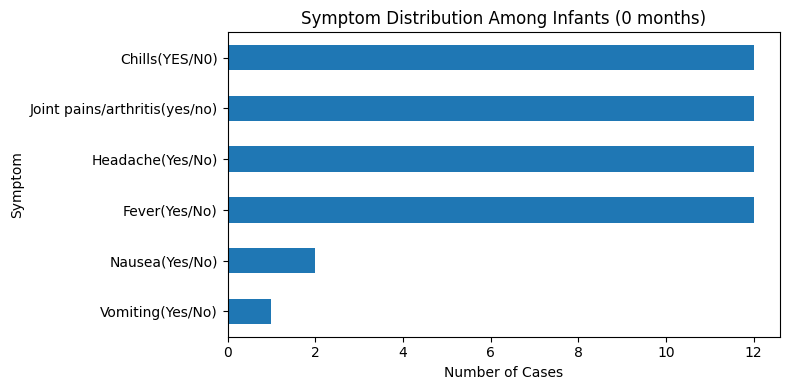

In [40]:
plt.figure(figsize=(8, 4))
infant_symptoms.sort_values(ascending=True).plot(kind='barh')
plt.title('Symptom Distribution Among Infants (0 months)')
plt.xlabel('Number of Cases')
plt.ylabel('Symptom')
plt.tight_layout()
plt.show()


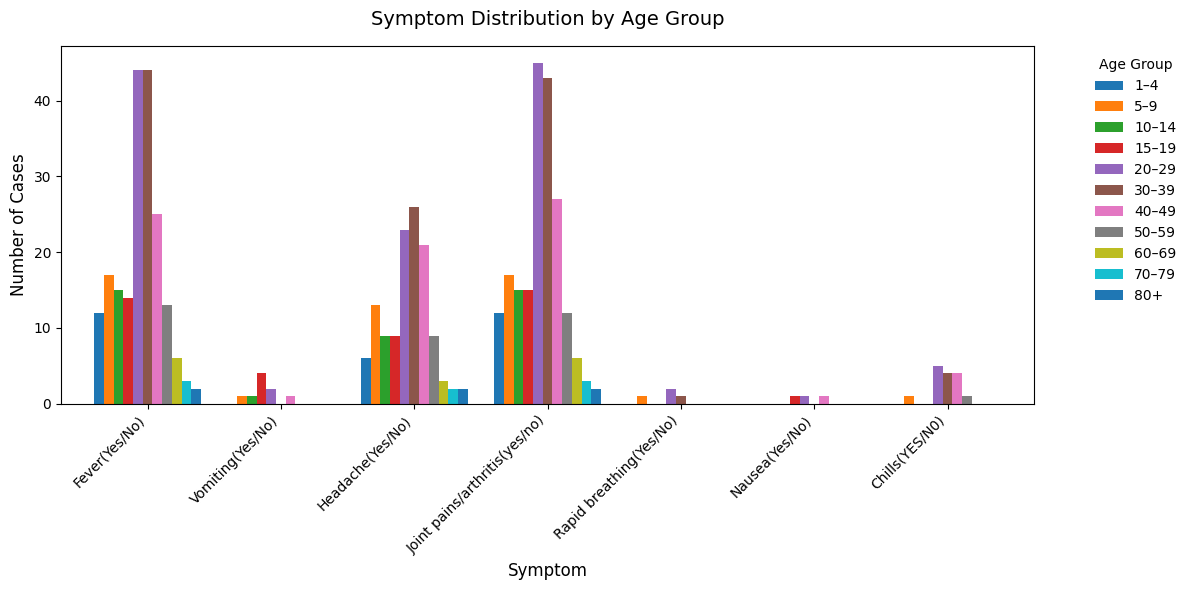

In [41]:
import matplotlib.pyplot as plt

# --- 1️⃣ Filter nonzero columns (symptoms) and nonzero rows (age groups)
symptom_by_age_filtered = symptom_by_age.loc[
    symptom_by_age.sum(axis=1) > 0,        # keep age groups with any 'yes'
    symptom_by_age.sum(axis=0) > 0         # keep symptoms with any 'yes'
]

# --- 2️⃣ Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

symptom_by_age_filtered.T.plot(
    kind='bar',
    ax=ax,
    width=0.8
)

# --- 3️⃣ Styling and labels
ax.set_title('Symptom Distribution by Age Group', fontsize=14, pad=15)
ax.set_xlabel('Symptom', fontsize=12)
ax.set_ylabel('Number of Cases', fontsize=12)
ax.legend(
    title='Age Group',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=False
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [42]:
# --- 1️⃣ Compute total cases per symptom across all age groups
symptom_totals = symptom_by_age.sum(axis=0)

# --- 2️⃣ Compute proportions by dividing each age group count by total per symptom
symptom_proportions = symptom_by_age.div(symptom_totals, axis=1)

# --- 3️⃣ Filter to show only symptoms and age groups that have nonzero proportions
symptom_proportions_filtered = symptom_proportions.loc[
    symptom_proportions.sum(axis=1) > 0,
    symptom_proportions.sum(axis=0) > 0
]

# --- 4️⃣ (Optional) Convert to percentages for clarity
symptom_proportions_pct = symptom_proportions_filtered * 100

# --- 5️⃣ Display the top rows to inspect
print(symptom_proportions_pct.round(2).head())


           Fever(Yes/No)  Vomiting(Yes/No)  Headache(Yes/No)  \
age_group                                                      
1–4                 6.15              0.00              4.88   
5–9                 8.72             11.11             10.57   
10–14               7.69             11.11              7.32   
15–19               7.18             44.44              7.32   
20–29              22.56             22.22             18.70   

           Joint pains/arthritis(yes/no)  Rapid breathing(Yes/No)  \
age_group                                                           
1–4                                 6.09                      0.0   
5–9                                 8.63                     25.0   
10–14                               7.61                      0.0   
15–19                               7.61                      0.0   
20–29                              22.84                     50.0   

           Nausea(Yes/No)  Chills(YES/N0)  
age_group              

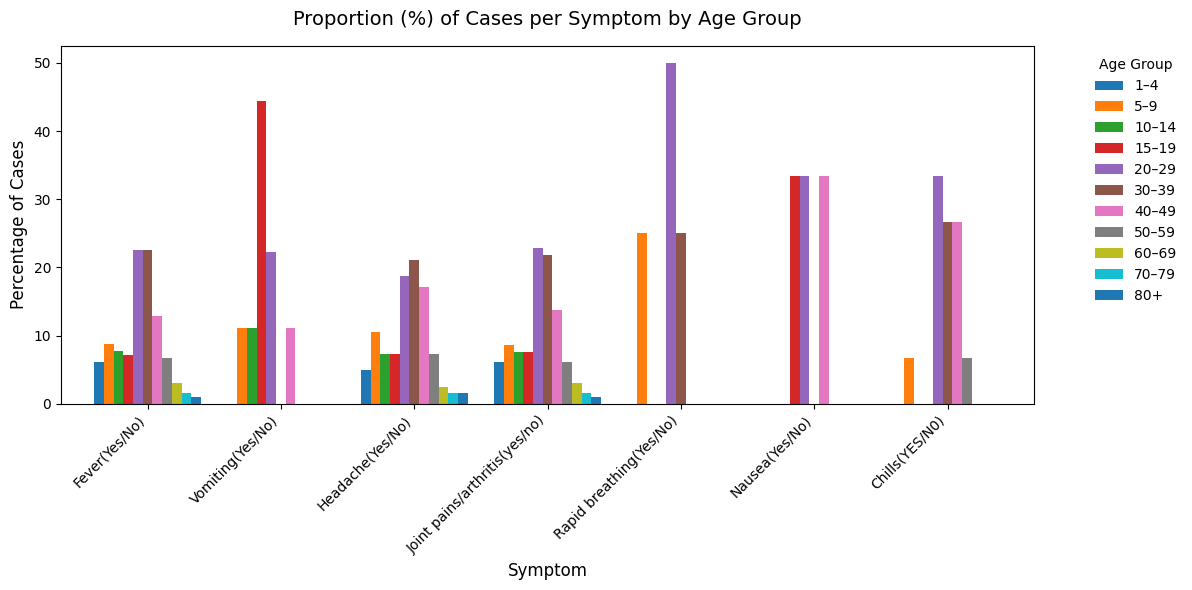

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

symptom_proportions_pct.T.plot(kind='bar', ax=ax, width=0.8)

ax.set_title('Proportion (%) of Cases per Symptom by Age Group', fontsize=14, pad=15)
ax.set_xlabel('Symptom', fontsize=12)
ax.set_ylabel('Percentage of Cases', fontsize=12)
ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [44]:
# Calculate total people (rows) in dataset
total_cases = len(chicks)

# Count how many said 'yes' for each symptom column
symptom_counts = (chicks[
    ['Fever(Yes/No)', 'Rash(Yes/No)', 'Pain behind the eyes(Yes/No)',
     'Vomiting(Yes/No)', 'Headache(Yes/No)', 'Joint pains/arthritis(yes/no)',
     'Rapid breathing(Yes/No)', 'Nausea(Yes/No)', 'swollen glands(Yes/No)',
     'severe abdominal(Yes/No)', 'Chills(YES/N0)']
] == 'yes').sum()

# Compute proportions (percentage)
symptom_proportions_overall = (symptom_counts / total_cases) * 100

# Sort from most to least common
symptom_proportions_overall = symptom_proportions_overall.sort_values(ascending=False)


In [45]:
total_cases

203

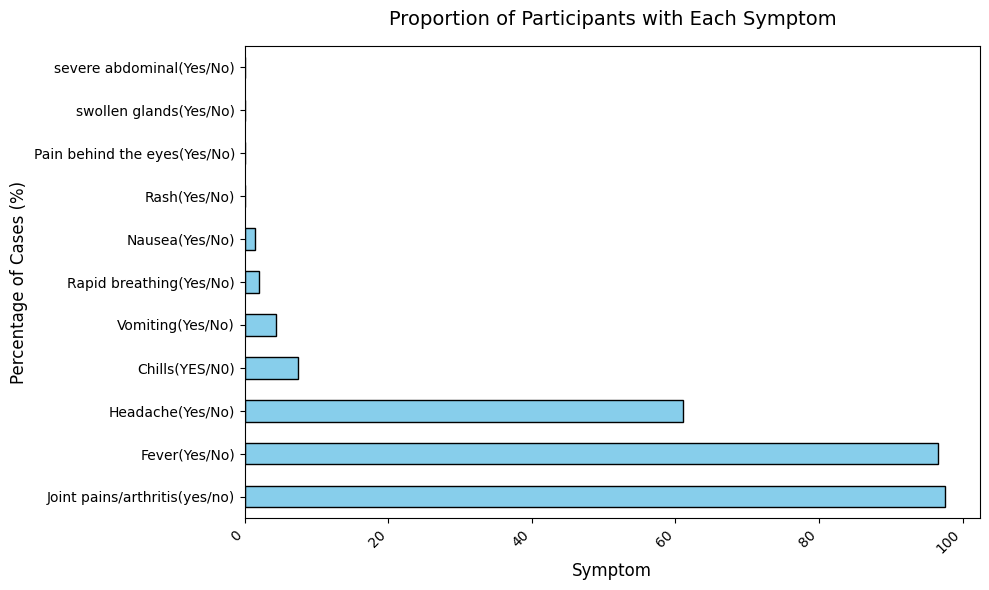

In [46]:
plt.figure(figsize=(10, 6))
symptom_proportions_overall.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Proportion of Participants with Each Symptom', fontsize=14, pad=15)
plt.ylabel('Percentage of Cases (%)', fontsize=12)
plt.xlabel('Symptom', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Data Cleaning and Understanding 

In [47]:
# 1. Identify columns that are completely null
null_columns = chicks.columns[chicks.isnull().all()]
print("Columns with all null values:")
print(null_columns)

Columns with all null values:
Index(['Dead', 'Date of Death', 'Comments', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41'],
      dtype='object')


In [48]:
# 2. Drop those columns
chicks = chicks.drop(columns=null_columns)

# Optional: Confirm they are dropped
print("\nRemaining columns after dropping all-null ones:")
print(chicks.columns)


Remaining columns after dropping all-null ones:
Index(['Column1', 'In patienT/Outpatient', 'County', 'Sub County', 'Ward',
       'Village or Town and Neighbourhood INDICATE major landmarks',
       'Health facility', 'Sex', 'Age(years)', 'Age in Months',
       'Date seen (ddmmyyyy)', 'Date of onset of illness (ddmmyyyy)',
       'Signs and Symptoms(yes/No)', 'Fever(Yes/No)', 'Rash(Yes/No)',
       'Pain behind the eyes(Yes/No)', 'Vomiting(Yes/No)', 'Headache(Yes/No)',
       'Joint pains/arthritis(yes/no)', 'Rapid breathing(Yes/No)',
       'Nausea(Yes/No)', 'swollen glands(Yes/No)', 'severe abdominal(Yes/No)',
       'Chills(YES/N0)', 'Other symptoms. Specify',
       'Was the patient a referal(Yes/No)', 'Specimen taken(Yes/No)',
       'Date specimen taken', 'Type of specimen(Blood/stool)',
       'Confirmed(Positive/Negative/Pending)', 'PCR Positive',
       'Disease Lab confirmed', 'Other confirmed diagnosis Specify',
       'Confirmation date ', 'Dead/Alive', 'Date_clean', 'age

In [49]:
chicks.shape

(203, 37)

In [50]:
chicks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 161 to 612
Data columns (total 37 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Column1                                                     203 non-null    float64       
 1   In patienT/Outpatient                                       100 non-null    object        
 2   County                                                      203 non-null    object        
 3   Sub County                                                  203 non-null    object        
 4   Ward                                                        159 non-null    object        
 5   Village or Town and Neighbourhood INDICATE major landmarks  191 non-null    object        
 6   Health facility                                             197 non-null    object        
 7   Sex                          

### Symptoms Distributions

In [51]:
chicks['Signs and Symptoms(yes/No)'].unique()

array(['yes', 'Yes', 'YES', 'Yyes', 'Y', nan], dtype=object)

In [52]:
chicks['Other symptoms. Specify'].unique()

array(['chills', 'dizziness', 'none', 'back pains', 'abdominal pains',
       'dizziness, palpitations ', nan, 'nausea', 'general body weakness',
       'backpain', 'coughing ', 'backpains', 'shivers', 'vomit ',
       'dizness', 'chils', 'stomache', 'lack of appetite', 'GBM',
       'chills,dizziness', 'throat pain', 'NO', 'Joint pain', 'cough',
       'shivers ', 'chills ', 'headache ', 'fever chills', 'rashes',
       'vomiting ', 'muscle pain ', 'muscle pains ', 'flue',
       'muscle pains', 'disoriented ', 'loss of appetite '], dtype=object)

In [53]:
def classify_severity(row):
    text = str(row['Other symptoms. Specify']).lower()
    
    # indicators of severe disease
    severe_terms = [
        'disoriented', 'severe', 'chronic', 'vomiting everything',
        'rapid breathing', 'dehydration', 'arthritis', '39.', '40.',
        'backpain', 'low back pain', 'unable to walk','palpitations','dizziness','abdominal pains'
    ]
    
    # check any severe symptom
    if any(term in text for term in severe_terms):
        return 'Severe'
    
    # if only mild symptoms (fever, headache, joint pain, rash, etc.)
    mild_terms = ['fever', 'headache', 'joint pain', 'rash', 'chills', 'nausea', 'vomiting', 'arthalgia']
    if any(term in text for term in mild_terms):
        return 'Mild'
    
    # if no symptoms or unclear
    return 'Unclassified'


In [54]:
chicks['severity'] = chicks.apply(classify_severity, axis=1)
chicks['severity'].value_counts()


severity
Unclassified    165
Mild             29
Severe            9
Name: count, dtype: int64

In [55]:
# Make sure we handle case differences like 'YES', 'yes', etc.
def normalize_yes(value):
    if isinstance(value, str):
        return value.strip().lower()
    return value

# Apply normalization to all relevant columns
cols = [
    'Fever(Yes/No)', 'Rash(Yes/No)', 'Pain behind the eyes(Yes/No)',
    'Vomiting(Yes/No)', 'Headache(Yes/No)', 'Joint pains/arthritis(yes/no)',
    'Rapid breathing(Yes/No)', 'Nausea(Yes/No)', 'swollen glands(Yes/No)',
    'severe abdominal(Yes/No)', 'Chills(YES/N0)'
]

for c in cols:
    if c in chicks.columns:
        chicks[c] = chicks[c].apply(normalize_yes)

# --- STEP 1: Severe symptoms ---
chicks.loc[
    (chicks['Rapid breathing(Yes/No)'] == 'yes') |
    (chicks['severe abdominal(Yes/No)'] == 'yes') |
    (chicks['Pain behind the eyes(Yes/No)'] == 'yes')|
    (chicks['swollen glands(Yes/No)'] == 'yes'),
    'severity'
] = 'Severe'

# --- STEP 2: Mild symptoms (only if not already classified) ---
chicks.loc[
    (chicks['Fever(Yes/No)'] == 'yes') &
    (chicks['Joint pains/arthritis(yes/no)'] == 'yes') &
    (chicks['Rash(Yes/No)'] == 'yes') &
    (chicks['Vomiting(Yes/No)'] == 'yes') &
    (chicks['Headache(Yes/No)'] == 'yes') &
    (chicks['Chills(YES/N0)'] == 'yes') &
    (chicks['Nausea(Yes/No)'] == 'yes') &
    (chicks['severity'].isna()),
    'severity'
] = 'Mild'

# --- STEP 3: Add fallback using "Other symptoms" free-text column ---
def classify_textual_symptoms(row):
    text = str(row['Other symptoms. Specify  for symptoms.']).lower()
    severe_terms = ['disoriented', 'severe', 'chronic', 'vomiting everything',
                    'rapid breathing', 'dehydration', 'arthritis', '39.', '40.',
                    'backpain', 'low back pain', 'unable to walk']
    mild_terms = ['fever', 'headache', 'joint pain', 'rash', 'chills', 'nausea', 'vomiting', 'dizziness']
    
    if any(term in text for term in severe_terms):
        return 'Severe'
    elif any(term in text for term in mild_terms):
        return 'Mild'
    else:
        return None

# Fill missing severity classifications from textual descriptions
chicks.loc[chicks['severity'].isna(), 'severity'] = chicks[chicks['severity'].isna()].apply(classify_textual_symptoms, axis=1)

# --- STEP 4: Label remaining rows ---
chicks['severity'] = chicks['severity'].fillna('Unclassified')

print(chicks['severity'].value_counts())


severity
Unclassified    164
Mild             26
Severe           13
Name: count, dtype: int64


In [56]:
chicks['severity'].value_counts()


severity
Unclassified    164
Mild             26
Severe           13
Name: count, dtype: int64

Mean and median age by severity 

In [57]:
chicks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 161 to 612
Data columns (total 38 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Column1                                                     203 non-null    float64       
 1   In patienT/Outpatient                                       100 non-null    object        
 2   County                                                      203 non-null    object        
 3   Sub County                                                  203 non-null    object        
 4   Ward                                                        159 non-null    object        
 5   Village or Town and Neighbourhood INDICATE major landmarks  191 non-null    object        
 6   Health facility                                             197 non-null    object        
 7   Sex                          

In [58]:
chicks.groupby('severity')['Age(years)'].describe()

,count,mean,std,min,25%,50%,75%,max
severity,,,,,,,,
Mild,26.0,30.346154,18.874199,4.0,16.25,28.0,42.0,80.0
Severe,13.0,26.730769,11.192660,7.5,21.00,25.0,28.0,49.0
Unclassified,163.0,29.625767,17.285577,1.0,16.00,28.0,40.5,80.0


In [59]:
chicks.groupby('severity')['Age in Months'].describe()

,count,mean,std,min,25%,50%,75%,max
severity,,,,,,,,
Mild,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Severe,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unclassified,22.0,83.590909,163.860469,0.0,0.0,0.0,105.75,720.0


In [60]:
#chicks[chicks['severity'] == 'Unclassified'].iloc[:, 10:25].head(10)


In the unclassified column, it 'doesn't group' anything new, it simply fills all missing values in the severity column with the text 'unclassified' 

So, rows that matched 'severe' or 'mild' rules keep those labels. Any row that did not match any rule remains as NaN in severity.
fillna('Unclassified') just replaces those remaining NaN values with 'Unclassified'.

/var/folders/b1/54t627gn56v8m5hqtp4zcn500000gn/T/ipykernel_5298/2530964629.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=chicks, x='severity', y='Age(years)', palette='Set2')


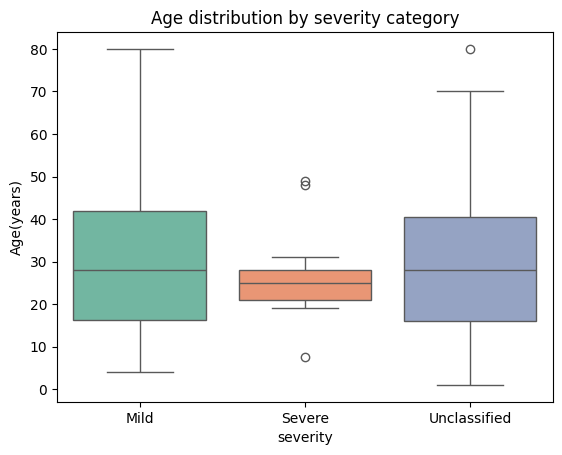

In [61]:
sns.boxplot(data=chicks, x='severity', y='Age(years)', palette='Set2')
plt.title('Age distribution by severity category')
plt.show()

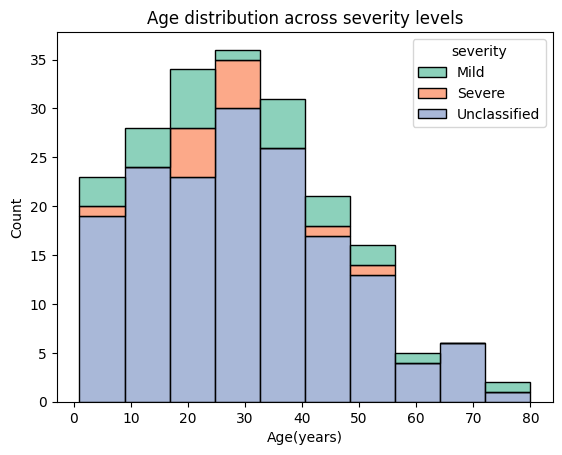

In [62]:
sns.histplot(data=chicks, x='Age(years)', hue='severity', multiple='stack', palette='Set2')
plt.title('Age distribution across severity levels')
plt.show()


In [63]:
# --- STEP 0: Normalize all Yes/No responses ---
def normalize_yes(value):
    if isinstance(value, str):
        return value.strip().lower()
    return value

symptom_cols = [
    'Fever(Yes/No)', 'Rash(Yes/No)', 'Pain behind the eyes(Yes/No)',
    'Vomiting(Yes/No)', 'Headache(Yes/No)', 'Joint pains/arthritis(yes/no)',
    'Rapid breathing(Yes/No)', 'Nausea(Yes/No)', 'swollen glands(Yes/No)',
    'severe abdominal(Yes/No)', 'Chills(YES/N0)'
]

for c in symptom_cols:
    if c in chicks.columns:
        chicks[c] = chicks[c].apply(normalize_yes)


# --- STEP 1: Define classification logic ---
def classify_row(row):
    """Hierarchical rule-based severity classification"""
    
    # 1️⃣ Check for severe features
    severe_symptoms = [
        'Rapid breathing(Yes/No)',
        'severe abdominal(Yes/No)',
        'Pain behind the eyes(Yes/No)',
        'swollen glands(Yes/No)',
    ]
    if any(row.get(col) == 'yes' for col in severe_symptoms):
        return 'Severe'
    
    # 2️⃣ Check for mild features (only if no severe ones)
    mild_symptoms = [
        'Fever(Yes/No)', 'Joint pains/arthritis(yes/no)',
        'Rash(Yes/No)', 'Vomiting(Yes/No)', 'Headache(Yes/No)',
        'Chills(YES/N0)', 'Nausea(Yes/No)'
    ]
    if any(row.get(col) == 'yes' for col in mild_symptoms):
        return 'Mild'
    
    # 3️⃣ Fallback: use text column for unstructured notes
    text = str(row.get('Other symptoms. Specify  for symptoms.', '')).lower()
    severe_terms = ['disoriented', 'severe', 'chronic', 'vomiting everything',
                    'rapid breathing', 'dehydration', 'arthritis', '39.', '40.',
                    'backpain', 'low back pain', 'unable to walk']
    mild_terms = ['fever', 'headache', 'joint pain', 'rash', 'chills', 'nausea', 'vomiting', 'dizziness']

    if any(term in text for term in severe_terms):
        return 'Severe'
    elif any(term in text for term in mild_terms):
        return 'Mild'
    
    # 4️⃣ If nothing matches
    return 'Unclassified'


# --- STEP 2: Apply function ---
chicks['severity'] = chicks.apply(classify_row, axis=1)

# --- STEP 3: Review results ---
print(chicks['severity'].value_counts())


severity
Mild            198
Severe            4
Unclassified      1
Name: count, dtype: int64


/var/folders/b1/54t627gn56v8m5hqtp4zcn500000gn/T/ipykernel_5298/2530964629.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=chicks, x='severity', y='Age(years)', palette='Set2')


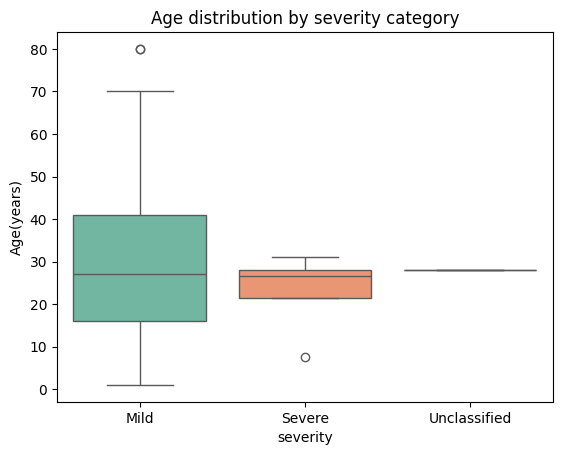

In [64]:
sns.boxplot(data=chicks, x='severity', y='Age(years)', palette='Set2')
plt.title('Age distribution by severity category')
plt.show()

### Locations analysis 

In [65]:
kenya = gpd.read_file("kenya_shape_files")
kenya


/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'kenya_shape_files': 'gadm41_KEN_3' (default), 'gadm41_KEN_2', 'gadm41_KEN_0', 'gadm41_KEN_1'. Specify layer parameter to avoid this warning.
  result = read_func(


,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,KEN.1.1.1_1,KEN,Kenya,KEN.1_1,Baringo,NA,KEN.1.1_1,805,NA,Lembus,NA,NA,Ward,Ward,805,NA,"POLYGON ((35.87727 -0.02973, 35.87699 -0.02947..."
1,KEN.1.2.1_1,KEN,Kenya,KEN.1_1,Baringo,NA,KEN.1.2_1,Baringo Central,NA,Ewalel/Chapchap,NA,NA,Ward,Ward,796,NA,"POLYGON ((35.7615 0.54171, 35.76158 0.54217, 3..."
2,KEN.1.2.2_1,KEN,Kenya,KEN.1_1,Baringo,NA,KEN.1.2_1,Baringo Central,NA,Kabarnet,NA,NA,Ward,Ward,793,NA,"POLYGON ((35.77209 0.57771, 35.77207 0.57754, ..."
3,KEN.1.2.3_1,KEN,Kenya,KEN.1_1,Baringo,NA,KEN.1.2_1,Baringo Central,NA,Kapropita,NA,NA,Ward,Ward,797,NA,"POLYGON ((35.7615 0.54171, 35.76163 0.54176, 3..."
4,KEN.1.2.4_1,KEN,Kenya,KEN.1_1,Baringo,NA,KEN.1.2_1,Baringo Central,NA,Sacho,NA,NA,Ward,Ward,794,NA,"POLYGON ((35.78914 0.44566, 35.78957 0.4453, 3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,KEN.47.4.1_1,KEN,Kenya,KEN.47_1,West Pokot,NA,KEN.47.4_1,Sigor,NA,Lomut,NA,NA,Ward,Ward,649,NA,"POLYGON ((35.70268 1.40092, 35.70284 1.40046, ..."
1438,KEN.47.4.2_1,KEN,Kenya,KEN.47_1,West Pokot,NA,KEN.47.4_1,Sigor,NA,Masool,NA,NA,Ward,Ward,648,NA,"POLYGON ((35.78546 1.65987, 35.78496 1.65954, ..."
1439,KEN.47.4.3_1,KEN,Kenya,KEN.47_1,West Pokot,NA,KEN.47.4_1,Sigor,NA,Sekerr,NA,NA,Ward,Ward,647,NA,"POLYGON ((35.37177 1.93195, 35.44525 1.86168, ..."
1440,KEN.47.4.4_1,KEN,Kenya,KEN.47_1,West Pokot,NA,KEN.47.4_1,Sigor,NA,Weiwei,NA,NA,Ward,Ward,650,NA,"POLYGON ((35.51809 1.27095, 35.51071 1.26523, ..."


In [66]:
print(kenya.shape)
print(kenya.columns)
kenya.head()

(1442, 17)
Index(['GID_3', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'GID_2',
       'NAME_2', 'NL_NAME_2', 'NAME_3', 'VARNAME_3', 'NL_NAME_3', 'TYPE_3',
       'ENGTYPE_3', 'CC_3', 'HASC_3', 'geometry'],
      dtype='object')


,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,KEN.1.1.1_1,KEN,Kenya,KEN.1_1,Baringo,NA,KEN.1.1_1,805,NA,Lembus,NA,NA,Ward,Ward,805,NA,"POLYGON ((35.87727 -0.02973, 35.87699 -0.02947..."
1,KEN.1.2.1_1,KEN,Kenya,KEN.1_1,Baringo,NA,KEN.1.2_1,Baringo Central,NA,Ewalel/Chapchap,NA,NA,Ward,Ward,796,NA,"POLYGON ((35.7615 0.54171, 35.76158 0.54217, 3..."
2,KEN.1.2.2_1,KEN,Kenya,KEN.1_1,Baringo,NA,KEN.1.2_1,Baringo Central,NA,Kabarnet,NA,NA,Ward,Ward,793,NA,"POLYGON ((35.77209 0.57771, 35.77207 0.57754, ..."
3,KEN.1.2.3_1,KEN,Kenya,KEN.1_1,Baringo,NA,KEN.1.2_1,Baringo Central,NA,Kapropita,NA,NA,Ward,Ward,797,NA,"POLYGON ((35.7615 0.54171, 35.76163 0.54176, 3..."
4,KEN.1.2.4_1,KEN,Kenya,KEN.1_1,Baringo,NA,KEN.1.2_1,Baringo Central,NA,Sacho,NA,NA,Ward,Ward,794,NA,"POLYGON ((35.78914 0.44566, 35.78957 0.4453, 3..."


In [67]:
# Select only county-level boundaries
#if "NAME_1" in kenya.columns:
    #kenya_counties = kenya[["NAME_1", "geometry"]]  # keep only county names and geometry
    #kenya_counties = kenya_counties.rename(columns={"NAME_1": "County"})
#elif "COUNTY" in kenya.columns:
    #kenya_counties = kenya[["COUNTY", "geometry"]]
#else:
    # fallback: manually inspect column names
    #kenya_counties = kenya


In [68]:
# Keep only the needed columns
kenya_admin = kenya[['NAME_1', 'NAME_2', 'geometry']]

# Drop rows that don’t have either county or subcounty names (if any)
kenya_admin = kenya_admin.dropna(subset=['NAME_1', 'NAME_2'])

kenya_admin.head()


,NAME_1,NAME_2,geometry
0,Baringo,805,"POLYGON ((35.87727 -0.02973, 35.87699 -0.02947..."
1,Baringo,Baringo Central,"POLYGON ((35.7615 0.54171, 35.76158 0.54217, 3..."
2,Baringo,Baringo Central,"POLYGON ((35.77209 0.57771, 35.77207 0.57754, ..."
3,Baringo,Baringo Central,"POLYGON ((35.7615 0.54171, 35.76163 0.54176, 3..."
4,Baringo,Baringo Central,"POLYGON ((35.78914 0.44566, 35.78957 0.4453, 3..."


In [69]:

selected = kenya_admin[kenya_admin['NAME_1']=='Mombasa']
selected.head()



,NAME_1,NAME_2,geometry
849,Mombasa,Changamwe,"POLYGON ((39.58535 -4.03681, 39.58535 -4.03621..."
850,Mombasa,Changamwe,"POLYGON ((39.64125 -4.03907, 39.6413 -4.03912,..."
851,Mombasa,Changamwe,"POLYGON ((39.61913 -4.01904, 39.61821 -4.01842..."
852,Mombasa,Changamwe,"POLYGON ((39.61914 -4.02051, 39.61913 -4.01904..."
853,Mombasa,Changamwe,"POLYGON ((39.60309 -4.04542, 39.60382 -4.04178..."


<Axes: >

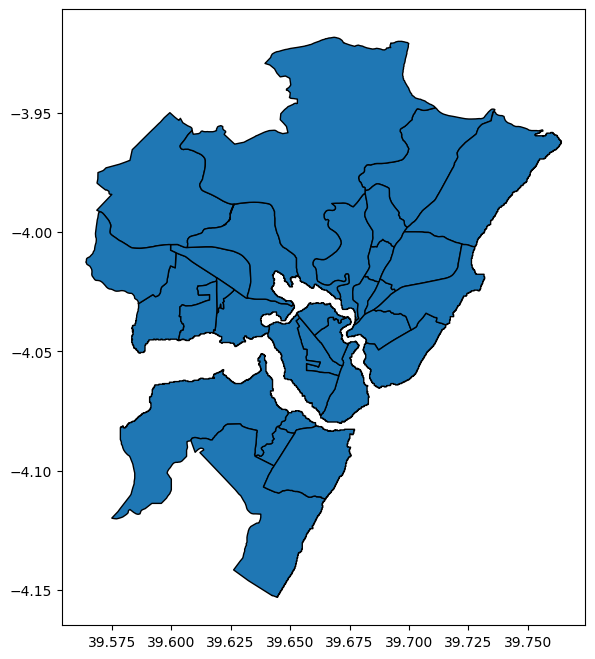

In [70]:
selected.plot(edgecolor='black', figsize=(8, 8))

In [71]:
chicks

,Column1,In patienT/Outpatient,County,Sub County,Ward,Village or Town and Neighbourhood INDICATE major landmarks,Health facility,Sex,Age(years),Age in Months,...,Type of specimen(Blood/stool),Confirmed(Positive/Negative/Pending),PCR Positive,Disease Lab confirmed,Other confirmed diagnosis Specify,Confirmation date,Dead/Alive,Date_clean,age_group,severity
161,162.0,opd,MOMBASA,Changamwe,Kipevu,Migadini,Lejamb Clinic,Female,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2025-05-16,20–29,Mild
162,163.0,opd,MOMBASA,Changamwe,Kipevu,Big Mama-Migadini Mwisho,Lejamb Clinic,Male,23.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2025-05-14,20–29,Mild
163,164.0,opd,MOMBASA,Changamwe,Kipevu,Migadini,Lejamb,Female,39.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2025-05-10,30–39,Mild
164,165.0,opd,MOMBASA,Changamwe,Kipevu,Migadini,Lejamb,Male,46.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2025-05-14,40–49,Mild
165,166.0,opd,MOMBASA,Changamwe,Kipevu,PN Masiru,Lejamb,Male,25.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Alive,2025-05-13,20–29,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,610.0,NaN,Mombasa,Likoni,NaN,ujamaa,Savani Medical,Male,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-24,50–59,Mild
609,611.0,NaN,Mombasa,Likoni,NaN,kiwerera,Savani Medical,Female,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-25,1–4,Mild
610,612.0,NaN,Mombasa,likoni,NaN,Soweto,Savani Medical,Male,48.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-26,40–49,Mild
611,613.0,NaN,Mombasa,likoni,NaN,ujamaa,Savani Medical,Male,23.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-28,20–29,Mild


In [72]:
chicks['County'].value_counts()

County
Mombasa       175
MOMBASA        16
msa             8
Mombasa         2
Mombasa         1
Tana River      1
Name: count, dtype: int64

In [73]:
# Standardize county names
chicks['County'] = (
    chicks['County']
    .astype(str)                 # Ensure they’re strings
    .str.strip()                 # Remove extra spaces
    .str.lower()                 # Make lowercase for consistency
    .replace({
        'msa': 'mombasa',        # Handle common abbreviation
    })
    .str.title()                 # Convert to Title Case
    .replace({'Nan': np.nan})
)

print(chicks['County'].unique())


['Mombasa' 'Tana River']


In [74]:
chicks['Sub County'].unique()

array(['Changamwe ', 'Nyali', 'Kisauni', 'Mvita', 'Likoni ', 'Jomvu',
       'NYALI', 'Likoni', 'Changamwe', 'Bura', 'likoni', 'likon',
       'Likoni  '], dtype=object)

In [75]:
# Standardize sub-county names
chicks['Sub County'] = (
    chicks['Sub County']
    .astype(str)                     # Convert to string
    .str.strip()                     # Remove extra spaces
    .str.lower()                     # Make lowercase
    .replace({
        'likon': 'likoni',           # Fix common typo
    })
    .str.title()                     # Convert to Title Case
)

print(chicks['Sub County'].unique())


['Changamwe' 'Nyali' 'Kisauni' 'Mvita' 'Likoni' 'Jomvu' 'Bura']


In [76]:
chicks['Sub County'].value_counts()

Sub County
Likoni       60
Kisauni      38
Mvita        38
Changamwe    30
Jomvu        20
Nyali        16
Bura          1
Name: count, dtype: int64

Count cases per sub-county

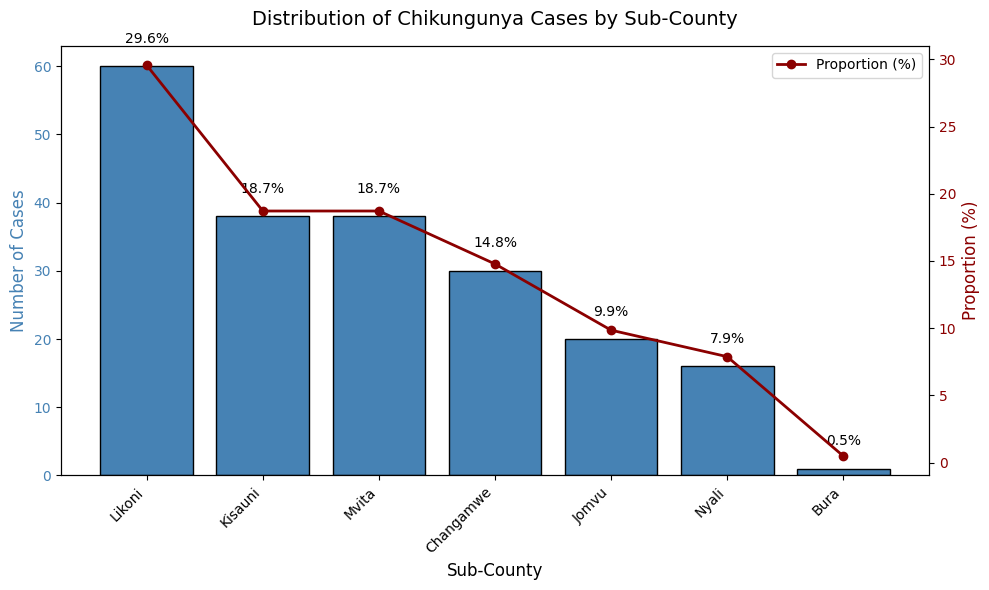

In [77]:
import matplotlib.pyplot as plt

# --- Clean and prepare data ---
subcounty_counts = chicks['Sub County'].dropna().value_counts().sort_values(ascending=False)
subcounty_proportions = (subcounty_counts / subcounty_counts.sum()) * 100

# --- Plot setup ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot (counts)
bars = ax1.bar(subcounty_counts.index, subcounty_counts.values, color='steelblue', edgecolor='black')

ax1.set_xlabel('Sub-County', fontsize=12)
ax1.set_ylabel('Number of Cases', color='steelblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='steelblue')
plt.xticks(rotation=45, ha='right')

# --- Add % labels on bars ---
for i, bar in enumerate(bars):
    height = bar.get_height()
    proportion = subcounty_proportions.values[i]
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height + 3,  # position a bit above the bar
        f"{proportion:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# --- Add line for proportions ---
ax2 = ax1.twinx()
ax2.plot(
    subcounty_counts.index,
    subcounty_proportions.values,
    color='darkred',
    marker='o',
    linewidth=2,
    label='Proportion (%)'
)
ax2.set_ylabel('Proportion (%)', color='darkred', fontsize=12)
ax2.tick_params(axis='y', labelcolor='darkred')

# --- Title and layout ---
plt.title('Distribution of Chikungunya Cases by Sub-County', fontsize=14, pad=15)
ax2.legend(loc='upper right')
fig.tight_layout()

plt.show()


In [78]:
chicks['Sex'].value_counts()

# Clean and standardize Sex column
chicks['Sex'] = chicks['Sex'].astype(str).str.strip().str.title()

# Keep only valid entries
chicks = chicks[chicks['Sex'].isin(['Male', 'Female'])]



In [79]:
# --- Step 1: Clean Sub County ---
chicks['Sub County'] = (
    chicks['Sub County']
    .astype(str)
    .str.strip()
    .str.title()  # e.g. 'likoni ' -> 'Likoni'
    .replace(['Nan', 'None', '', 'Na', 'Null'], pd.NA)  # handle fake NaNs
)

# --- Step 2: Clean Sex column ---
chicks['Sex'] = (
    chicks['Sex']
    .astype(str)
    .str.strip()
    .str.title()
    .replace(['Nan', 'None', '', 'Na', 'Null'], pd.NA)
)

# --- Step 3: Drop missing values in either column ---
chicks_clean = chicks.dropna(subset=['Sub County', 'Sex'])

# --- Step 4: Keep only Male/Female ---
chicks_clean = chicks_clean[chicks_clean['Sex'].isin(['Male', 'Female'])]


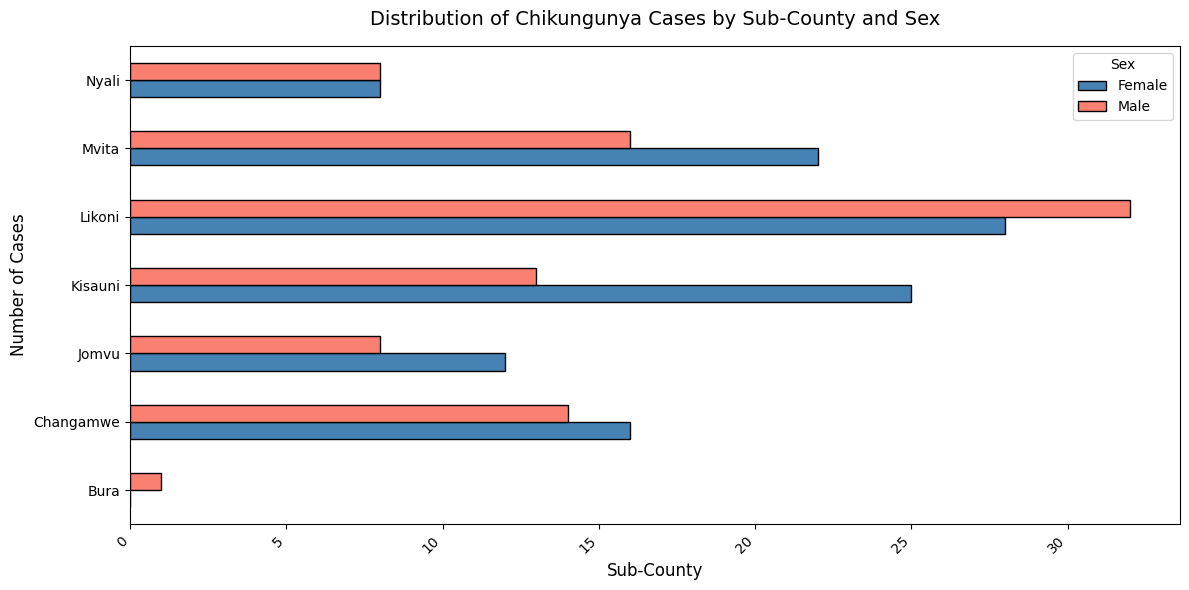

In [80]:

# Count cases by Sub County and Sex
subcounty_sex_counts = chicks_clean.groupby(['Sub County', 'Sex']).size().unstack(fill_value=0)

# Plot grouped bar chart
subcounty_sex_counts.plot(kind='barh', figsize=(12, 6), color=['steelblue', 'salmon'], edgecolor='black')

plt.title('Distribution of Chikungunya Cases by Sub-County and Sex', fontsize=14, pad=15)
plt.xlabel('Sub-County', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


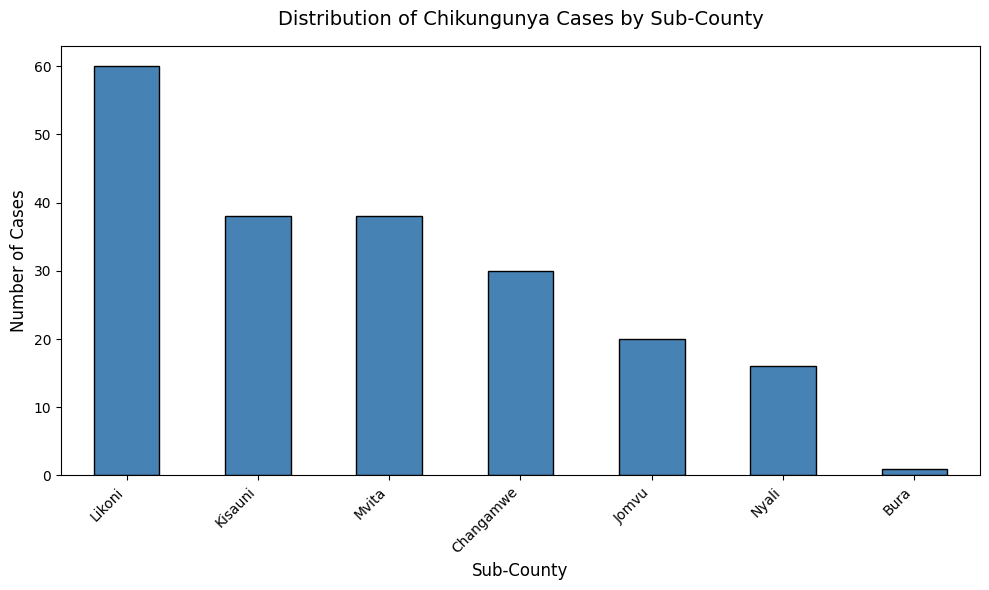

In [81]:
subcounty_counts = chicks['Sub County'].value_counts().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
subcounty_counts.plot(kind='bar', color='steelblue', edgecolor='black')

plt.title('Distribution of Chikungunya Cases by Sub-County', fontsize=14, pad=15)
plt.xlabel('Sub-County', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Dates analysis and cleaning

In [82]:
chicks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 161 to 612
Data columns (total 38 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Column1                                                     203 non-null    float64       
 1   In patienT/Outpatient                                       100 non-null    object        
 2   County                                                      203 non-null    object        
 3   Sub County                                                  203 non-null    object        
 4   Ward                                                        159 non-null    object        
 5   Village or Town and Neighbourhood INDICATE major landmarks  191 non-null    object        
 6   Health facility                                             197 non-null    object        
 7   Sex                          

In [83]:
chicks['Other confirmed diagnosis Specify'].value_counts()

Other confirmed diagnosis Specify
Dengue fever    18
none             9
MALARIA          1
Name: count, dtype: int64

In [84]:
chicks['In patienT/Outpatient'].value_counts()

In patienT/Outpatient
out patient    37
Out patient    20
outpatient     18
opd            15
OUTPATIENT      9
OPD             1
Name: count, dtype: int64

In [85]:


def clean_patient_status(value):
    if not isinstance(value, str):
        return np.nan
    
    text = value.strip().lower()
    
    # Remove embedded dates or digits (like 'outpatient17/5/2025' or '4545')
    text = ''.join([c for c in text if not c.isdigit() and c not in '/-'])
    
    # Standardize variants
    if 'in' in text and 'out' not in text:  # captures 'inpatient', 'in patient'
        return 'Inpatient'
    elif 'out' in text or 'op' in text:     # captures 'outpatient', 'opd', 'op'
        return 'Outpatient'
    else:
        return np.nan


In [86]:
chicks['PatientStatus'] = chicks['In patienT/Outpatient'].apply(clean_patient_status)


In [87]:
print(chicks['PatientStatus'].value_counts(dropna=False))


PatientStatus
NaN           103
Outpatient    100
Name: count, dtype: int64


In [88]:
symptom_cols = [
    'Fever(Yes/No)', 'Rash(Yes/No)', 'Pain behind the eyes(Yes/No)',
    'Vomiting(Yes/No)', 'Headache(Yes/No)', 'Joint pains/arthritis(yes/no)',
    'Rapid breathing(Yes/No)', 'Nausea(Yes/No)', 'swollen glands(Yes/No)',
    'severe abdominal(Yes/No)', 'Chills(YES/N0)'
]


In [89]:
def normalize_yes(value):
    if isinstance(value, str):
        return value.strip().lower()
    return value

for c in symptom_cols:
    if c in chicks.columns:
        chicks[c] = chicks[c].apply(normalize_yes)


In [90]:
symptom_by_status = (
    chicks[symptom_cols + ['PatientStatus']]
    .melt(id_vars='PatientStatus', var_name='Symptom', value_name='Response')
    .query("Response == 'yes'")
    .groupby(['PatientStatus', 'Symptom'])
    .size()
    .unstack(fill_value=0)
)


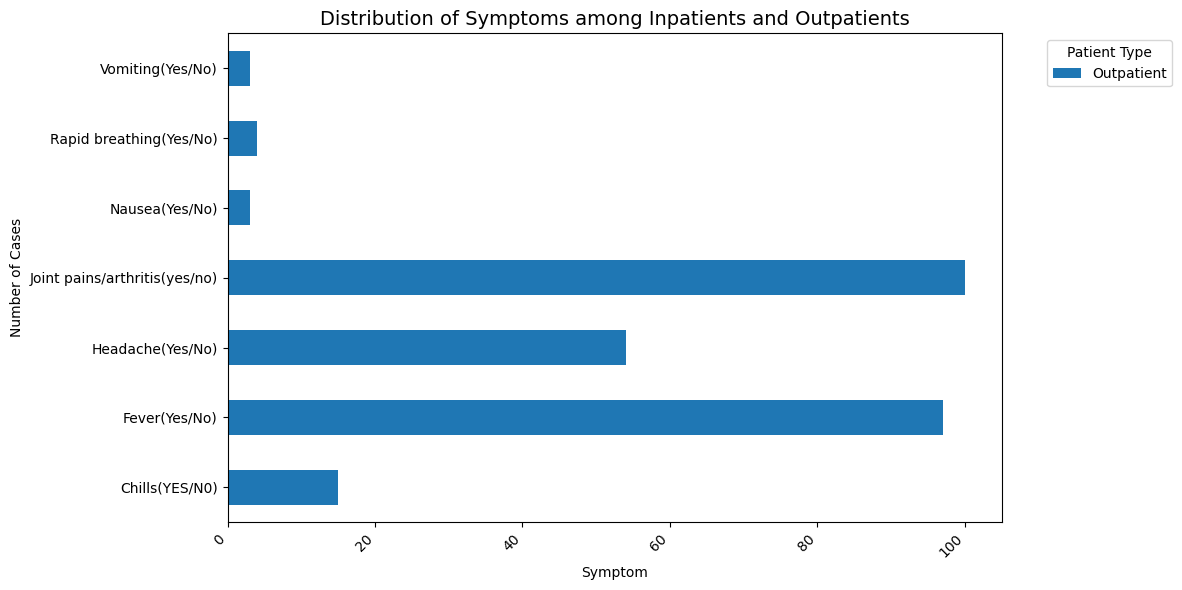

In [91]:
import matplotlib.pyplot as plt

symptom_by_status.T.plot(kind='barh', figsize=(12, 6))
plt.title('Distribution of Symptoms among Inpatients and Outpatients', fontsize=14)
plt.ylabel('Number of Cases')
plt.xlabel('Symptom')
plt.legend(title='Patient Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


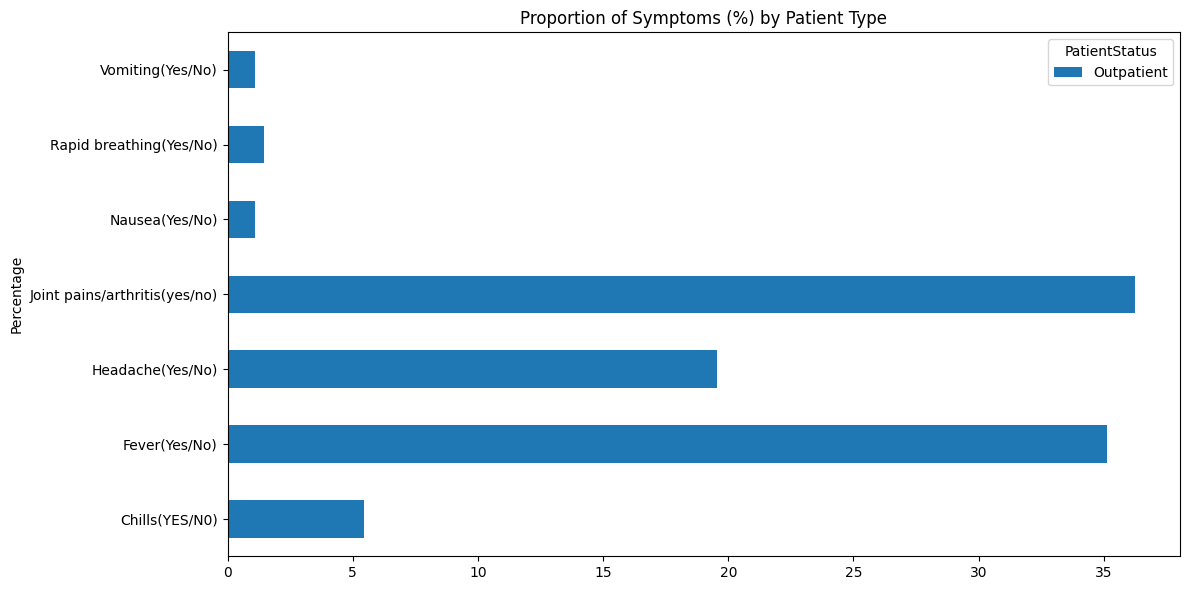

In [92]:
symptom_by_status_pct = symptom_by_status.div(symptom_by_status.sum(axis=1), axis=0) * 100
symptom_by_status_pct.T.plot(kind='barh', figsize=(12,6))
plt.title('Proportion of Symptoms (%) by Patient Type')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


In [93]:
#chicks[['Date of onset of illness (ddmmyyyy)','Date seen (ddmmyyyy)','']]

In [94]:
chicks['Health facility'].nunique()

50

## MODEL PARAMETERS

In [95]:
total = len(chicks)

prop_less_60 = (chicks['Age(years)'] < 60).sum() / total * 100
prop_greater_60 = (chicks['Age(years)'] >= 60).sum() / total * 100

print("Proportion <60:", prop_less_60)
print("Proportion ≥60:", prop_greater_60)

Proportion <60: 94.08866995073892
Proportion ≥60: 5.41871921182266


In [96]:
chicks.shape

(203, 39)

### CHIKV-Data-KHIS

In [97]:
chickv = pd.read_csv(r'data 2/CHIKV_data_KHIS.csv')

chickv

,periodid,periodname,periodcode,perioddescription,organisationunitid,organisationunitname,organisationunitcode,organisationunitdescription,MOH 705A Rev 2020_ Chikungunya
0,202104,April 2021,202104,NaN,N7YETT3A9r1,Kwale County,KE_County_2,NaN,1
1,202204,April 2022,202204,NaN,CeLsrJOH0g9,Wajir County,KE_County_8,NaN,10
2,202204,April 2022,202204,NaN,R6f9znhg37c,Mandera County,KE_County_9,NaN,32
3,202204,April 2022,202204,NaN,wsBsC6gjHvn,Mombasa County,KE_County_1,NaN,10
4,202204,April 2022,202204,NaN,NjWSbQTwys4,Lamu County,KE_County_5,NaN,5
...,...,...,...,...,...,...,...,...,...
255,202409,September 2024,202409,NaN,R6f9znhg37c,Mandera County,KE_County_9,NaN,184
256,202409,September 2024,202409,NaN,jkG3zaihdSs,Nairobi County,KE_County_47,NaN,1
257,202409,September 2024,202409,NaN,nrI2khZx3d0,Kilifi County,KE_County_3,NaN,2
258,202409,September 2024,202409,NaN,NjWSbQTwys4,Lamu County,KE_County_5,NaN,13


In [98]:
chickv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   periodid                        260 non-null    int64  
 1   periodname                      260 non-null    object 
 2   periodcode                      260 non-null    int64  
 3   perioddescription               0 non-null      float64
 4   organisationunitid              260 non-null    object 
 5   organisationunitname            260 non-null    object 
 6   organisationunitcode            260 non-null    object 
 7   organisationunitdescription     0 non-null      float64
 8   MOH 705A Rev 2020_ Chikungunya  260 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 18.4+ KB


In [99]:
chickv.shape

(260, 9)

In [100]:
# 1. Identify columns that are completely null
null_columns = chickv.columns[chickv.isnull().all()]
print("Columns with all null values:")
print(null_columns)

Columns with all null values:
Index(['perioddescription', 'organisationunitdescription'], dtype='object')


In [101]:
# 2. Drop those columns
chickv = chickv.drop(columns=null_columns)

# Optional: Confirm they are dropped
print("\nRemaining columns after dropping all-null ones:")
print(chickv.columns)


Remaining columns after dropping all-null ones:
Index(['periodid', 'periodname', 'periodcode', 'organisationunitid',
       'organisationunitname', 'organisationunitcode',
       'MOH 705A Rev 2020_ Chikungunya'],
      dtype='object')


In [102]:
chickv.head()

,periodid,periodname,periodcode,organisationunitid,organisationunitname,organisationunitcode,MOH 705A Rev 2020_ Chikungunya
0,202104,April 2021,202104,N7YETT3A9r1,Kwale County,KE_County_2,1
1,202204,April 2022,202204,CeLsrJOH0g9,Wajir County,KE_County_8,10
2,202204,April 2022,202204,R6f9znhg37c,Mandera County,KE_County_9,32
3,202204,April 2022,202204,wsBsC6gjHvn,Mombasa County,KE_County_1,10
4,202204,April 2022,202204,NjWSbQTwys4,Lamu County,KE_County_5,5


In [103]:
chickv['organisationunitname'].nunique()

28

In [104]:
chickv['organisationunitname'].value_counts()

organisationunitname
Lamu County               47
Mombasa County            45
Mandera County            31
Kilifi County             31
Nairobi County            22
Kisumu County             13
Kwale County              12
Garissa County            10
Tana River County          9
Wajir County               5
Migori County              4
Nakuru County              3
Turkana County             3
Kakamega County            3
Bungoma County             3
Laikipia County            2
Taita Taveta County        2
Homa Bay County            2
Meru County                2
Uasin Gishu County         2
Kericho County             2
Kitui County               1
Nyeri County               1
Siaya County               1
Vihiga County              1
Elgeyo Marakwet County     1
Samburu County             1
Machakos County            1
Name: count, dtype: int64

In [105]:
# Example: column name is 'County'
chickv['organisationunitname'] = chickv['organisationunitname'].str.replace(r'\s*county\s*$', '', case=False, regex=True).str.strip()


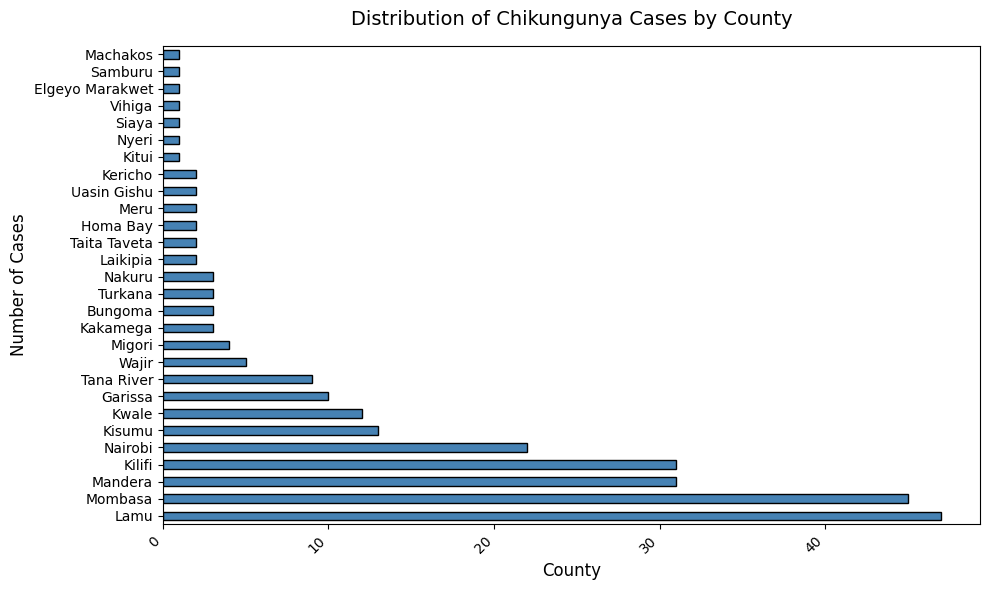

In [106]:
county_counts = chickv['organisationunitname'].value_counts().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
county_counts.plot(kind='barh', color='steelblue', edgecolor='black')

plt.title('Distribution of Chikungunya Cases by County', fontsize=14, pad=15)
plt.xlabel('County', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [107]:
chickv['periodname'].max()

'September 2024'

In [108]:
chickv['periodname'].min()


'April 2021'

### Fever data per county

In [109]:
fever_county = pd.read_csv(r'data 2/KHIS_data_fever_county.csv')

fever_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 10 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   periodid                                                                        2437 non-null   int64  
 1   periodname                                                                      2437 non-null   object 
 2   periodcode                                                                      2437 non-null   int64  
 3   perioddescription                                                               0 non-null      float64
 4   organisationunitid                                                              2437 non-null   object 
 5   organisationunitname                                                            2437 non-null   object 
 6   organisationunit

In [110]:
# 1. Identify columns that are completely null
null_columns = fever_county.columns[fever_county.isnull().all()]
print("Columns with all null values:")
print(null_columns)

Columns with all null values:
Index(['perioddescription', 'organisationunitdescription'], dtype='object')


In [111]:
# 2. Drop those columns
fever_county = fever_county.drop(columns=null_columns)

# Optional: Confirm they are dropped
print("\nRemaining columns after dropping all-null ones:")
print(fever_county.columns)


Remaining columns after dropping all-null ones:
Index(['periodid', 'periodname', 'periodcode', 'organisationunitid',
       'organisationunitname', 'organisationunitcode',
       'MOH 515 Rev 2020_Number of over 5 years cases with fever for less than 7 days',
       'MOH 515 Rev 2020_Number of under 5 years cases with fever for less than 7 days'],
      dtype='object')


In [112]:
fever_county

,periodid,periodname,periodcode,organisationunitid,organisationunitname,organisationunitcode,MOH 515 Rev 2020_Number of over 5 years cases with fever for less than 7 days,MOH 515 Rev 2020_Number of under 5 years cases with fever for less than 7 days
0,202104,Apr-21,202104,BoDytkJQ4Qi,Makueni County,KE_County_17,76.0,61.0
1,202104,Apr-21,202104,Eey8fT4Im3y,Marsabit County,KE_County_10,118.0,132.0
2,202104,Apr-21,202104,pZqQRRW7PHP,Uasin Gishu County,KE_County_27,98.0,180.0
3,202104,Apr-21,202104,vvOK1BxTbet,Baringo County,KE_County_30,70.0,40.0
4,202104,Apr-21,202104,o36zCRjSd4G,Samburu County,KE_County_25,11.0,10.0
...,...,...,...,...,...,...,...,...
2432,202409,Sep-24,202409,ob6SxuRcqU4,Nakuru County,KE_County_32,309.0,282.0
2433,202409,Sep-24,202409,t0J75eHKxz5,Nandi County,KE_County_29,3.0,71.0
2434,202409,Sep-24,202409,yhCUgGcCcOo,Machakos County,KE_County_16,18.0,240.0
2435,202409,Sep-24,202409,T4urHM47nlm,Tharaka Nithi County,KE_County_13,162.0,145.0


In [113]:
fever_county['periodname'].unique()[:20]


array(['Apr-21', 'Apr-22', 'Apr-23', 'Apr-24', 'Apr-25', 'Aug-21',
       'Aug-22', 'Aug-23', 'Aug-24', 'Dec-21', 'Dec-22', 'Dec-23',
       'Dec-24', 'Feb-21', 'Feb-22', 'Feb-23', 'Feb-24', 'Feb-25',
       'Jan-21', 'Jan-22'], dtype=object)

In [114]:
fever_county['Date'] = pd.to_datetime(fever_county['periodname'], format='%b-%y', errors='coerce')




In [115]:
fever_county[['periodname', 'Date']].head(10)


,periodname,Date
0,Apr-21,2021-04-01
1,Apr-21,2021-04-01
2,Apr-21,2021-04-01
3,Apr-21,2021-04-01
4,Apr-21,2021-04-01
5,Apr-21,2021-04-01
6,Apr-21,2021-04-01
7,Apr-21,2021-04-01
8,Apr-21,2021-04-01
9,Apr-21,2021-04-01


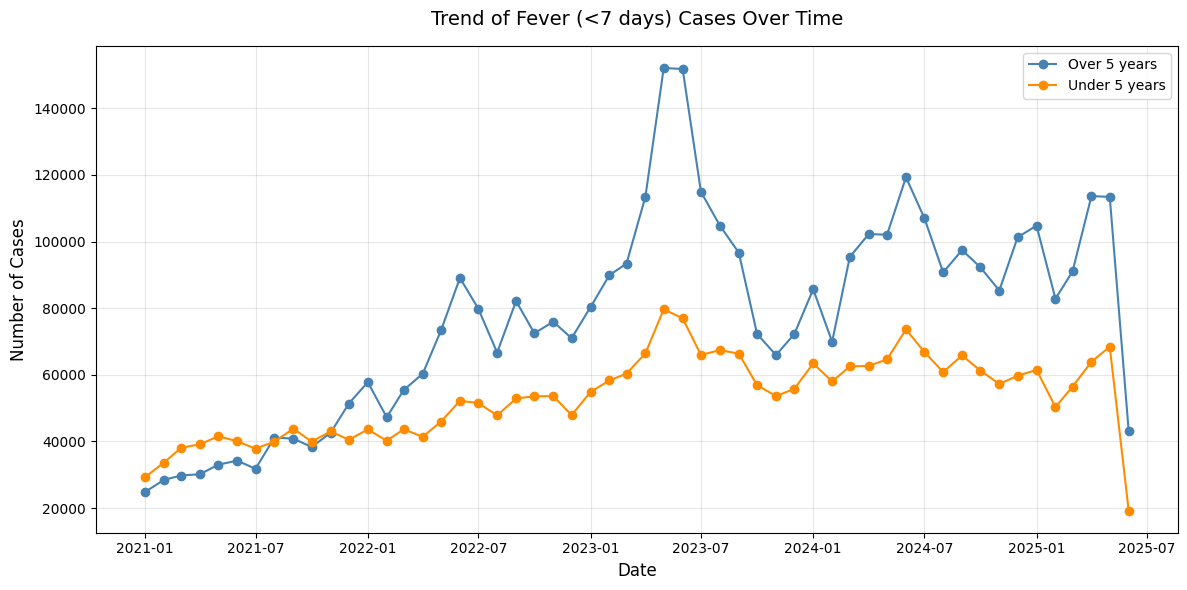

In [116]:

# --- Drop rows without valid dates ---
fever_county = fever_county.dropna(subset=['Date'])

# --- Group by Date and sum the cases ---
time_trend = fever_county.groupby('Date')[[
    'MOH 515 Rev 2020_Number of over 5 years cases with fever for less than 7 days',
    'MOH 515 Rev 2020_Number of under 5 years cases with fever for less than 7 days'
]].sum()

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(time_trend.index, time_trend.iloc[:, 0], marker='o', color='steelblue', label='Over 5 years')
plt.plot(time_trend.index, time_trend.iloc[:, 1], marker='o', color='darkorange', label='Under 5 years')

plt.title('Trend of Fever (<7 days) Cases Over Time', fontsize=14, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



In [117]:
fever_county['organisationunitname'].nunique()

47

In [118]:
fever_county['periodname'].max()

'Sep-24'

In [119]:
fever_county['periodname'].min()

'Apr-21'

In [120]:
# Example: column name is 'County'
fever_county['organisationunitname'] = fever_county['organisationunitname'].str.replace(r'\s*county\s*$', '', case=False, regex=True).str.strip()

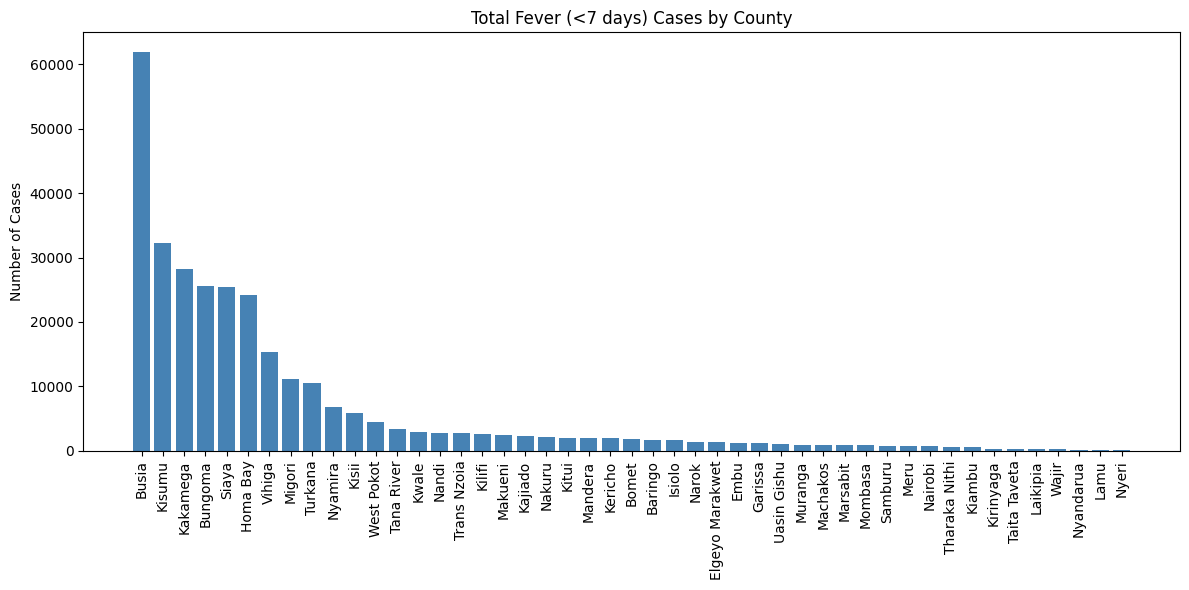

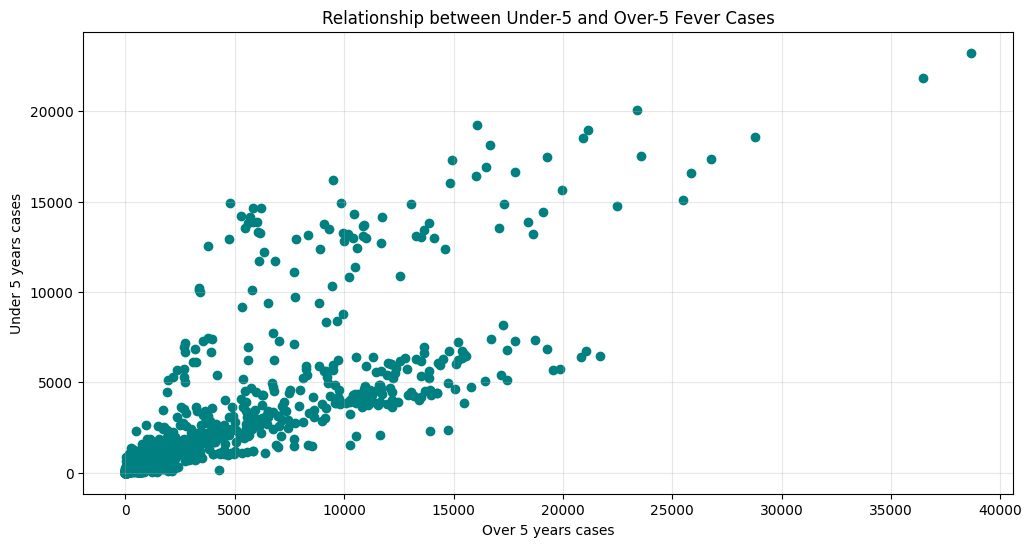

In [121]:


# Example: assuming your dataframe is `fever`
# and columns are named like in your message
fever_county['Total fever cases'] = (
    fever_county['MOH 515 Rev 2020_Number of over 5 years cases with fever for less than 7 days'] +
    fever_county['MOH 515 Rev 2020_Number of under 5 years cases with fever for less than 7 days']
)

# Proportion under 5 years
fever_county['Under5 proportion'] = (
    fever_county['MOH 515 Rev 2020_Number of under 5 years cases with fever for less than 7 days'] /
    fever_county['Total fever cases']
) * 100

# --- Sort and visualize ---
fever_sorted = fever_county.sort_values('Total fever cases', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(fever_sorted['organisationunitname'], fever_sorted['Total fever cases'], color='steelblue')
plt.xticks(rotation=90)
plt.title('Total Fever (<7 days) Cases by County')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

# --- Age pattern visualization ---
plt.figure(figsize=(12,6))
plt.scatter(fever_county['MOH 515 Rev 2020_Number of over 5 years cases with fever for less than 7 days'],
            fever_county['MOH 515 Rev 2020_Number of under 5 years cases with fever for less than 7 days'],
            color='teal')
plt.xlabel('Over 5 years cases')
plt.ylabel('Under 5 years cases')
plt.title('Relationship between Under-5 and Over-5 Fever Cases')
plt.grid(True, alpha=0.3)
plt.show()


## KHIS DATA FEVER

In [122]:
fever = pd.read_csv(r'data 2/KHIS_data_fever.csv')

fever

,periodid,periodname,periodcode,perioddescription,organisationunitid,organisationunitname,organisationunitcode,organisationunitdescription,Fevers,IDSR Other Viral Haemorrhagic Fevers Total,MOH 515 Rev 2020_Number of over 5 years cases with fever for less than 7 days,MOH 515 Rev 2020_Number of under 5 years cases with fever for less than 7 days,MOH_744A_No. of Neurological disorders
0,202504,April 2025,202504,NaN,Ulj33KBau7V,Kirinyaga County,KE_County_20,NaN,NaN,NaN,20.0,66.0,NaN
1,202504,April 2025,202504,NaN,ADMywdLwoRX,Msambweni Sub County,KE_SubCounty_3080,NaN,NaN,NaN,51.0,38.0,15.0
2,202504,April 2025,202504,NaN,PRpKwAloU5b,Kisumu East Sub County,KE_SubCounty_3068,NaN,NaN,NaN,1080.0,935.0,NaN
3,202504,April 2025,202504,NaN,e1J7R103h8I,Nambale Sub County,KE_SubCounty_2977,NaN,NaN,NaN,861.0,615.0,NaN
4,202504,April 2025,202504,NaN,Eey8fT4Im3y,Marsabit County,KE_County_10,NaN,NaN,NaN,201.0,308.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,202409,September 2024,202409,NaN,aqYhbqKclsI,Webuye West Sub County,KE_SubCounty_2966,NaN,NaN,NaN,245.0,951.0,3.0
3391,202409,September 2024,202409,NaN,f6EOn3xI9YH,Kirinyaga North/Mwea West Sub County,KE_SubCounty_3052,NaN,NaN,NaN,20.0,14.0,NaN
3392,202409,September 2024,202409,NaN,U3lGZ71W9Te,Tigania East Sub County,KE_SubCounty_3114,NaN,NaN,NaN,26.0,39.0,NaN
3393,202409,September 2024,202409,NaN,A6Sj8RumZ0m,Nyaribari Masaba Sub County,KE_SubCounty_3056,NaN,NaN,NaN,85.0,77.0,NaN


In [123]:
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 13 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   periodid                                                                        3395 non-null   int64  
 1   periodname                                                                      3395 non-null   object 
 2   periodcode                                                                      3395 non-null   int64  
 3   perioddescription                                                               0 non-null      float64
 4   organisationunitid                                                              3395 non-null   object 
 5   organisationunitname                                                            3395 non-null   object 
 6   organisationunit

In [124]:
# Calculate missingness
missing_count = fever.isnull().sum()
missing_percent = (fever.isnull().mean() * 100).round(2)

# Combine into one DataFrame
missing_table = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

# Display the table
missing_table


,Missing Count,Missing %
perioddescription,3395,100.00
Fevers,3372,99.32
IDSR Other Viral Haemorrhagic Fevers Total,3362,99.03
organisationunitdescription,3271,96.35
MOH_744A_No. of Neurological disorders,2441,71.90
MOH 515 Rev 2020_Number of over 5 years cases with fever for less than 7 days,504,14.85
MOH 515 Rev 2020_Number of under 5 years cases with fever for less than 7 days,268,7.89
organisationunitcode,67,1.97
periodid,0,0.00
periodname,0,0.00


In [125]:

missing_percent = fever.isnull().mean() * 100

# display the result sorted from highest to lowest missingness
missing_percent.sort_values(ascending=False)


perioddescription                                                                 100.000000
Fevers                                                                             99.322533
IDSR Other Viral Haemorrhagic Fevers Total                                         99.027982
organisationunitdescription                                                        96.347570
MOH_744A_No. of Neurological disorders                                             71.899853
MOH 515 Rev 2020_Number of over 5 years cases with fever for less than 7 days      14.845361
MOH 515 Rev 2020_Number of under 5 years cases with fever for less than 7 days      7.893962
organisationunitcode                                                                1.973490
periodid                                                                            0.000000
periodname                                                                          0.000000
periodcode                                                            

In [126]:
import re
import numpy as np
import pandas as pd

# normalize name text (safe-cast to str for NA rows), remove punctuation and collapse spaces
fever['organisationunitname_clean'] = (
    fever['organisationunitname'].astype(str)
         .str.strip()
         .str.lower()
         .str.replace(r'[^\w\s]', '', regex=True)   # remove punctuation like '.' ','
         .str.replace(r'\s+', ' ', regex=True)
)

# create columns as object dtype (so assigning strings is safe)
fever['county'] = pd.Series([None] * len(fever), index=fever.index, dtype='object')
fever['subcounty'] = pd.Series([None] * len(fever), index=fever.index, dtype='object')

# 1) Mark subcounties first (handles both "sub county" and "subcounty")
mask_sub = fever['organisationunitname_clean'].str.endswith('sub county', na=False) | \
           fever['organisationunitname_clean'].str.endswith('subcounty', na=False)
fever.loc[mask_sub, 'subcounty'] = fever.loc[mask_sub, 'organisationunitname']

# 2) Then mark counties but exclude those already matched as subcounty
mask_county = fever['organisationunitname_clean'].str.endswith('county', na=False) & ~mask_sub
fever.loc[mask_county, 'county'] = fever.loc[mask_county, 'organisationunitname']

# 3) Fallback: where neither was found from the name, use organisationunitcode if it contains hints
mask_missing = fever['county'].isna() & fever['subcounty'].isna()
mask_code_county = mask_missing & fever['organisationunitcode'].astype(str).str.contains('county', case=False, na=False)
mask_code_sub   = mask_missing & fever['organisationunitcode'].astype(str).str.contains('sub county|subcounty', case=False, na=False)

fever.loc[mask_code_county, 'county'] = fever.loc[mask_code_county, 'organisationunitname']
fever.loc[mask_code_sub,   'subcounty'] = fever.loc[mask_code_sub,   'organisationunitname']

# Optional: if you want the pure name without the "County"/"Sub County" suffix
def strip_suffix(x):
    if pd.isna(x):
        return x
    return re.sub(r'\s*(?:sub\s*county|subcounty|county)$', '', x, flags=re.IGNORECASE).strip()

fever['county_name'] = fever['county'].apply(strip_suffix)
fever['subcounty_name'] = fever['subcounty'].apply(strip_suffix)

# tidy up
fever.drop(columns='organisationunitname_clean', inplace=True)

# quick checks
print("Still-unassigned rows (both null):")
print(fever.loc[fever['county'].isna() & fever['subcounty'].isna(), 
               ['organisationunitname', 'organisationunitcode']].head(10))


Still-unassigned rows (both null):
Empty DataFrame
Columns: [organisationunitname, organisationunitcode]
Index: []


In [127]:
fever

,periodid,periodname,periodcode,perioddescription,organisationunitid,organisationunitname,organisationunitcode,organisationunitdescription,Fevers,IDSR Other Viral Haemorrhagic Fevers Total,MOH 515 Rev 2020_Number of over 5 years cases with fever for less than 7 days,MOH 515 Rev 2020_Number of under 5 years cases with fever for less than 7 days,MOH_744A_No. of Neurological disorders,county,subcounty,county_name,subcounty_name
0,202504,April 2025,202504,NaN,Ulj33KBau7V,Kirinyaga County,KE_County_20,NaN,NaN,NaN,20.0,66.0,NaN,Kirinyaga County,None,Kirinyaga,None
1,202504,April 2025,202504,NaN,ADMywdLwoRX,Msambweni Sub County,KE_SubCounty_3080,NaN,NaN,NaN,51.0,38.0,15.0,None,Msambweni Sub County,None,Msambweni
2,202504,April 2025,202504,NaN,PRpKwAloU5b,Kisumu East Sub County,KE_SubCounty_3068,NaN,NaN,NaN,1080.0,935.0,NaN,None,Kisumu East Sub County,None,Kisumu East
3,202504,April 2025,202504,NaN,e1J7R103h8I,Nambale Sub County,KE_SubCounty_2977,NaN,NaN,NaN,861.0,615.0,NaN,None,Nambale Sub County,None,Nambale
4,202504,April 2025,202504,NaN,Eey8fT4Im3y,Marsabit County,KE_County_10,NaN,NaN,NaN,201.0,308.0,2.0,Marsabit County,None,Marsabit,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,202409,September 2024,202409,NaN,aqYhbqKclsI,Webuye West Sub County,KE_SubCounty_2966,NaN,NaN,NaN,245.0,951.0,3.0,None,Webuye West Sub County,None,Webuye West
3391,202409,September 2024,202409,NaN,f6EOn3xI9YH,Kirinyaga North/Mwea West Sub County,KE_SubCounty_3052,NaN,NaN,NaN,20.0,14.0,NaN,None,Kirinyaga North/Mwea West Sub County,None,Kirinyaga North/Mwea West
3392,202409,September 2024,202409,NaN,U3lGZ71W9Te,Tigania East Sub County,KE_SubCounty_3114,NaN,NaN,NaN,26.0,39.0,NaN,None,Tigania East Sub County,None,Tigania East
3393,202409,September 2024,202409,NaN,A6Sj8RumZ0m,Nyaribari Masaba Sub County,KE_SubCounty_3056,NaN,NaN,NaN,85.0,77.0,NaN,None,Nyaribari Masaba Sub County,None,Nyaribari Masaba


In [128]:
# Group by county and sum the values
neuro_by_county = (
    fever.groupby('county', dropna=True)['MOH_744A_No. of Neurological disorders']
         .sum()
         .reset_index()
         .sort_values(by='MOH_744A_No. of Neurological disorders', ascending=False)
)

# Display the table
print(neuro_by_county.to_string(index=False))


                county  MOH_744A_No. of Neurological disorders
        Nairobi County                                  5389.0
        Garissa County                                  3082.0
       Machakos County                                  2775.0
         Kisumu County                                  1647.0
         Nakuru County                                  1469.0
          Kwale County                                  1423.0
        Mombasa County                                  1360.0
         Kilifi County                                  1302.0
    Uasin Gishu County                                  1269.0
          Nyeri County                                  1035.0
        Turkana County                                  1028.0
           Embu County                                   703.0
       Kakamega County                                   556.0
        Kericho County                                   516.0
          Nandi County                                 

In [129]:
fever['county'] = fever['county'].str.replace(r'\s*County\s*$', '', case=False, regex=True).str.strip()

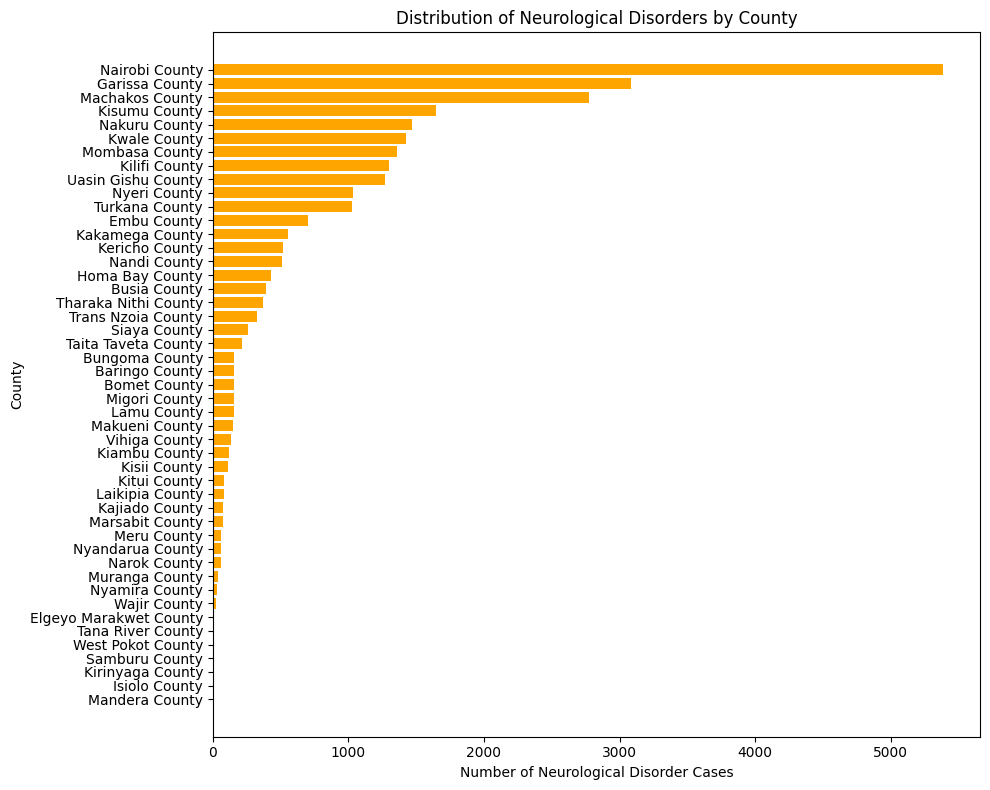

In [130]:


plt.figure(figsize=(10, 8))
plt.barh(
    neuro_by_county['county'],
    neuro_by_county['MOH_744A_No. of Neurological disorders'],
    color='orange'
)
plt.xlabel('Number of Neurological Disorder Cases')
plt.ylabel('County')
plt.title('Distribution of Neurological Disorders by County')
plt.gca().invert_yaxis()  # so top counties appear at the top
plt.tight_layout()
plt.show()


### NOW CASTING MODEL

In [131]:
chicks.columns

Index(['Column1', 'In patienT/Outpatient', 'County', 'Sub County', 'Ward',
       'Village or Town and Neighbourhood INDICATE major landmarks',
       'Health facility', 'Sex', 'Age(years)', 'Age in Months',
       'Date seen (ddmmyyyy)', 'Date of onset of illness (ddmmyyyy)',
       'Signs and Symptoms(yes/No)', 'Fever(Yes/No)', 'Rash(Yes/No)',
       'Pain behind the eyes(Yes/No)', 'Vomiting(Yes/No)', 'Headache(Yes/No)',
       'Joint pains/arthritis(yes/no)', 'Rapid breathing(Yes/No)',
       'Nausea(Yes/No)', 'swollen glands(Yes/No)', 'severe abdominal(Yes/No)',
       'Chills(YES/N0)', 'Other symptoms. Specify',
       'Was the patient a referal(Yes/No)', 'Specimen taken(Yes/No)',
       'Date specimen taken', 'Type of specimen(Blood/stool)',
       'Confirmed(Positive/Negative/Pending)', 'PCR Positive',
       'Disease Lab confirmed', 'Other confirmed diagnosis Specify',
       'Confirmation date ', 'Dead/Alive', 'Date_clean', 'age_group',
       'severity', 'PatientStatus'],
   

In [132]:
chicks['Date seen (ddmmyyyy)'].value_counts()

Date seen (ddmmyyyy)
2025-05-21    17
2025-05-22    16
2025-06-11    13
2025-06-17    12
2025-06-03    12
2025-06-13     8
2025-05-20     8
2025-06-05     8
2025-06-21     7
2025-06-04     7
2025-06-14     6
2025-06-09     6
2025-06-06     5
2025-06-15     5
2025-06-16     5
2025-06-24     4
2025-06-22     4
2025-06-10     4
2025-06-12     4
2025-05-29     4
2025-05-19     4
2025-06-27     4
2025-06-07     4
2025-05-15     4
2025-06-20     3
2025-06-18     3
2025-06-19     3
2025-06-02     2
2025-05-17     2
2025-06-23     2
2025-06-26     2
2025-06-28     2
2025-05-16     2
2025-06-25     1
2025-05-18     1
2025-06-01     1
2025-05-25     1
2025-06-08     1
2025-05-26     1
2025-05-12     1
2025-05-11     1
2025-05-03     1
2025-05-14     1
2025-06-29     1
Name: count, dtype: int64

In [133]:
chicks['Date of onset of illness (ddmmyyyy)'].value_counts()

Date of onset of illness (ddmmyyyy)
2025-06-16    11
2025-05-19    10
2025-05-18    10
2025-05-20     9
2025-06-08     7
2025-06-09     7
2025-06-13     7
2025-06-10     7
2025-06-07     7
2025-06-20     6
2025-06-11     6
2025-06-19     6
2025-05-30     5
2025-06-05     5
2025-05-17     5
2025-05-22     5
2025-06-24     4
2025-06-21     4
2025-06-15     4
2025-04-06     4
2025-05-06     4
2025-05-16     4
2025-05-21     4
2025-06-04     4
2025-06-12     3
2025-03-06     3
2025-05-14     3
2025-01-06     3
2025-06-17     3
2025-06-18     3
2025-06-02     3
2025-05-27     3
2025-06-06     3
2025-06-03     3
2025-06-14     3
2025-06-22     2
2025-05-13     2
2025-05-11     2
2025-06-25     2
2025-05-31     2
2025-06-01     2
2025-05-12     2
2025-06-27     1
2025-06-26     1
2025-06-23     1
2025-02-06     1
2025-05-29     1
2025-05-23     1
2025-05-28     1
2025-05-09     1
2025-05-01     1
2025-05-10     1
2025-06-28     1
Name: count, dtype: int64

In [134]:
chicks['delay'] = (chicks['Date seen (ddmmyyyy)']- chicks['Date of onset of illness (ddmmyyyy)']).dt.days

In [135]:
chicks['delay'].describe()

count    203.000000
mean       7.852217
std       23.371681
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max      148.000000
Name: delay, dtype: float64

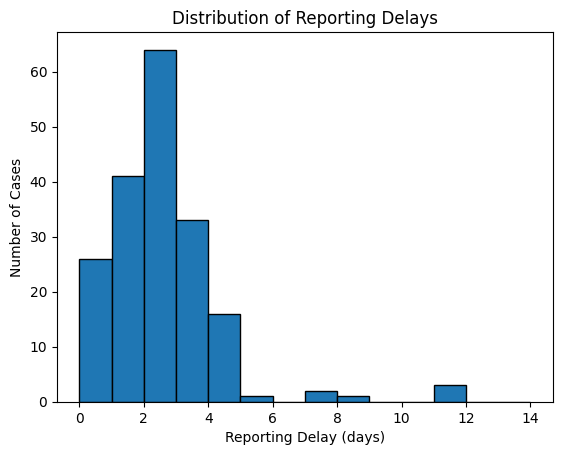

In [136]:
plt.hist(chicks['delay'], bins=range(0, 15), edgecolor='black')
plt.xlabel('Reporting Delay (days)')
plt.ylabel('Number of Cases')
plt.title('Distribution of Reporting Delays')
plt.show()

#### We fit a probability distribution; poisson to capture the pattern of delays mathematically.

In [137]:
from scipy.stats import poisson

mean_delay = chicks['delay'].mean()

print(f"Estimated mean delay (λ): {mean_delay:.2f} days")


Estimated mean delay (λ): 7.85 days


#### Build the Poisson delay CDF

In [138]:
max_delay = chicks['delay'].max()
max_delay = 148
delay_cdf = [poisson.cdf(x, mu=mean_delay) for x in range(0, max_delay)]

In [139]:
#Aggregate cases by onset date 
cases_by_onset = chicks.groupby('Date of onset of illness (ddmmyyyy)').size().reindex(
    pd.date_range(chicks['Date of onset of illness (ddmmyyyy)'].min(), chicks['Date of onset of illness (ddmmyyyy)'].max()),
    fill_value=0
)

### Apply nowcasting adjustment
"Nowcasting" is a statistical technique used to correct for the underreporting that happens in real-time because of delays between a person getting sick (onset date) and their case being officially recorded (reporting date). The model (using a Poisson Delay distribution, as noted in the title) attempts to estimate the cases that have occurred but have not yet been reported.

In [140]:
nowcasted_cases = []
today = chicks['Date seen (ddmmyyyy)'].max()

for onset_day in cases_by_onset.index:
    days_since_onset = (today - onset_day).days
    p_reported = delay_cdf[min(days_since_onset, len(delay_cdf)-1)]  # probability reported by now
    
    if p_reported == 0:
        # Avoid division by zero
        nowcasted_cases.append(cases_by_onset[onset_day])
    else:
        # Adjust for underreporting
        nowcasted_cases.append(cases_by_onset[onset_day] / p_reported)


##### Build results dataframe

In [141]:
nowcast_df = pd.DataFrame({
    'onset_date': cases_by_onset.index,
    'reported_cases': cases_by_onset.values,
    'nowcasted_cases': nowcasted_cases
})

nowcast_df

,onset_date,reported_cases,nowcasted_cases
0,2025-01-06,3,3.000000
1,2025-01-07,0,0.000000
2,2025-01-08,0,0.000000
3,2025-01-09,0,0.000000
4,2025-01-10,0,0.000000
...,...,...,...
169,2025-06-24,4,19.497772
170,2025-06-25,2,18.448191
171,2025-06-26,1,21.362352
172,2025-06-27,1,64.802717


In [142]:
nowcast_df['onset_date'].value_counts()

onset_date
2025-01-06    1
2025-05-05    1
2025-04-27    1
2025-04-28    1
2025-04-29    1
             ..
2025-03-06    1
2025-03-07    1
2025-03-08    1
2025-03-09    1
2025-06-28    1
Name: count, Length: 174, dtype: int64

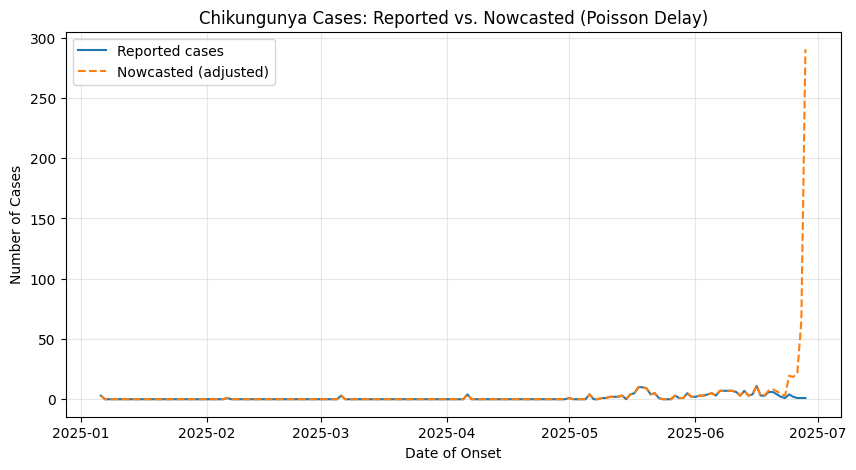

In [143]:
plt.figure(figsize=(10,5))
plt.plot(nowcast_df['onset_date'], nowcast_df['reported_cases'], label='Reported cases')
plt.plot(nowcast_df['onset_date'], nowcast_df['nowcasted_cases'], label='Nowcasted (adjusted)', linestyle='--')
plt.title('Chikungunya Cases: Reported vs. Nowcasted (Poisson Delay)')
plt.xlabel('Date of Onset')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [147]:


reported = nowcast_df['reported_cases']
p_reported_list = []

today = chicks['Date seen (ddmmyyyy)'].max()

for onset_day in nowcast_df['onset_date']:
    days_since_onset = (today - onset_day).days
    p = delay_cdf[min(days_since_onset, len(delay_cdf)-1)]
    p_reported_list.append(p if p > 0 else 1)

p_reported = np.array(p_reported_list)

# Poisson-based CI
nowcast_df['lower_ci'] = np.maximum(
    (reported - 1.96 * np.sqrt(reported)) / p_reported, 0
)

nowcast_df['upper_ci'] = (
    (reported + 1.96 * np.sqrt(reported)) / p_reported
)


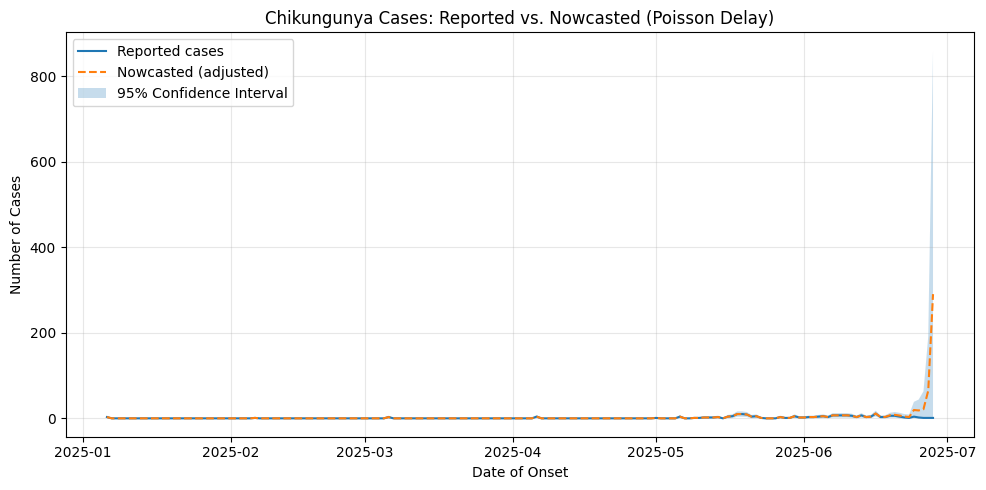

In [148]:
plt.figure(figsize=(10, 5))

# Reported cases
plt.plot(
    nowcast_df['onset_date'],
    nowcast_df['reported_cases'],
    label='Reported cases'
)

# Nowcasted cases
plt.plot(
    nowcast_df['onset_date'],
    nowcast_df['nowcasted_cases'],
    label='Nowcasted (adjusted)',
    linestyle='--'
)

# Confidence interval shading
plt.fill_between(
    nowcast_df['onset_date'],
    nowcast_df['lower_ci'],
    nowcast_df['upper_ci'],
    alpha=0.25,
    label='95% Confidence Interval'
)

plt.title('Chikungunya Cases: Reported vs. Nowcasted (Poisson Delay)')
plt.xlabel('Date of Onset')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Estimated Reporting Completeness Over Time')

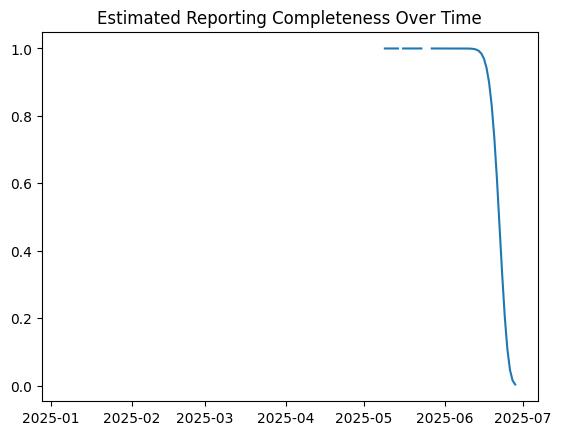

In [144]:
nowcast_df['completeness'] = nowcast_df['reported_cases'] / nowcast_df['nowcasted_cases']
plt.plot(nowcast_df['onset_date'], nowcast_df['completeness'])
plt.title('Estimated Reporting Completeness Over Time')


## Way forward with work: Chikungunya model
- Code model with parameters
- add confidence interval to now casting
- proportion of moving people from linelist data

Fitted mean delay (lambda) = 3.993 days (n=1200)
Nominal (fitted) Poisson CDF: 80% reported by day 6, 95% by day 8


/var/folders/b1/54t627gn56v8m5hqtp4zcn500000gn/T/ipykernel_5298/2880341479.py:90: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  x = mdates.date2num(results['onset_date'].dt.to_pydatetime())
/var/folders/b1/54t627gn56v8m5hqtp4zcn500000gn/T/ipykernel_5298/2880341479.py:97: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(x, y_reported, fmt='-', label='Reported (observed)')
/var/folders/b1/54t627gn56v8m5hqtp4zcn500000gn/T/ipykernel_5298/2880341479.py:98: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(x, y_med, fmt='--', label='Nowcast median')


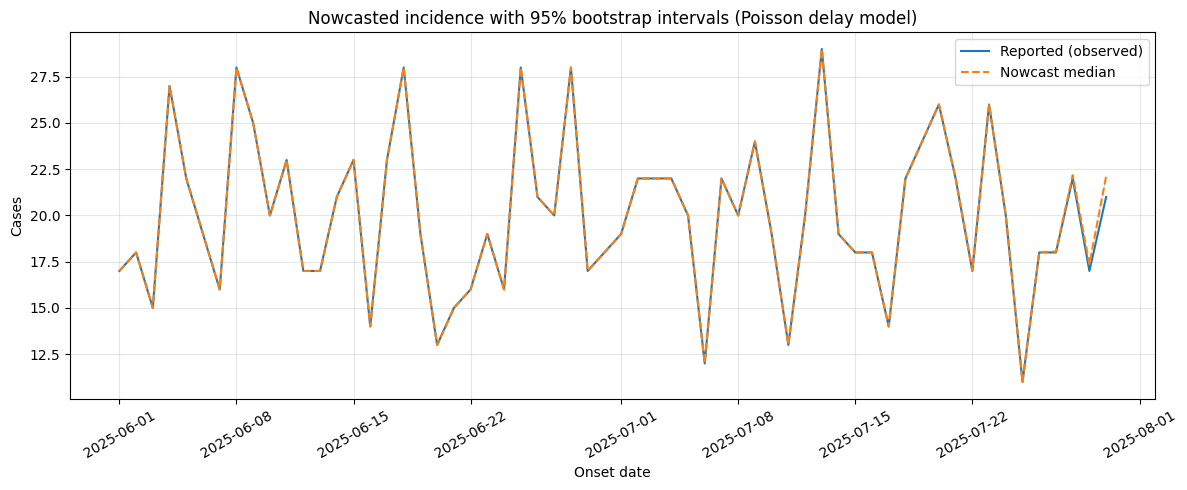


Recent 14 days:

onset_date  reported_cases  nowcast_median  nowcast_lower_95  nowcast_upper_95  completeness_median
2025-07-17              14            14.0              14.0              14.0             1.000000
2025-07-18              22            22.0              22.0              22.0             1.000000
2025-07-19              24            24.0              24.0              24.0             1.000000
2025-07-20              26            26.0              26.0              26.0             1.000000
2025-07-21              22            22.0              22.0              22.0             0.999999
2025-07-22              17            17.0              17.0              17.0             0.999995
2025-07-23              26            26.0              26.0              26.0             0.999980
2025-07-24              20            20.0              20.0              20.0             0.999925
2025-07-25              11            11.0              11.0              11.0    

In [145]:
# add confidence interval to the now casted model 
# Bootstrap nowcasting uncertainty (Poisson delay model)
# Run this in your local notebook / environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson
import datetime as dt
import matplotlib.dates as mdates

# ========== USER OPTIONS ==========
USE_SYNTHETIC = True   # Set False to load your CSV instead
CSV_PATH = "chikungunya_cases.csv"  # only used if USE_SYNTHETIC = False
N_BOOTSTRAP = 1000
MAX_DELAY = 20         # max delay days considered for CDF
P_FLOOR = 0.01         # floor on reporting probability to avoid huge inflation
# ==================================

# 1) Load data (or create synthetic example)
if not USE_SYNTHETIC:
    df = pd.read_csv(CSV_PATH, parse_dates=['onset_date', 'report_date'])
else:
    rng = np.random.default_rng(12345)
    n_cases = 1200
    start = pd.to_datetime("2025-06-01")
    onset_offsets = np.random.choice(np.concatenate([np.arange(0,30), np.arange(30,60)[::-1]]), size=n_cases)
    onsets = pd.Series(start + pd.to_timedelta(onset_offsets, unit='D'))
    true_mean_delay = 4.0
    delays = rng.poisson(lam=true_mean_delay, size=n_cases)
    reports = pd.Series(onsets + pd.to_timedelta(delays, unit='D'))
    df = pd.DataFrame({'onset_date': onsets, 'report_date': reports})

# Ensure correct dtypes and create delay column
df['onset_date'] = pd.to_datetime(df['onset_date'])
df['report_date'] = pd.to_datetime(df['report_date'])
df['delay'] = (df['report_date'] - df['onset_date']).dt.days
df = df[df['delay'] >= 0].copy()  # drop negative delays if present

# 2) Aggregate reported counts by onset date
all_dates = pd.date_range(df['onset_date'].min(), df['onset_date'].max())
reported_by_onset = df.groupby('onset_date').size().reindex(all_dates, fill_value=0)
today = df['report_date'].max()

# 3) Fit Poisson mean delay
mean_delay = df['delay'].mean()
print(f"Fitted mean delay (lambda) = {mean_delay:.3f} days (n={len(df)})")

# 4) Nominal CDF (for summary metrics)
days = np.arange(0, MAX_DELAY+1)
nominal_cdf = poisson.cdf(days, mu=mean_delay)
day_80 = days[np.searchsorted(nominal_cdf, 0.8)]
day_95 = days[np.searchsorted(nominal_cdf, 0.95)]
print(f"Nominal (fitted) Poisson CDF: 80% reported by day {day_80}, 95% by day {day_95}")

# 5) Bootstrap resampling of delays and propagate to nowcast
B = N_BOOTSTRAP
nowcast_samples = np.zeros((B, len(all_dates)), dtype=float)
delays_array = df['delay'].values
n_delays = len(delays_array)
rng = np.random.default_rng(0)

for b in range(B):
    # resample observed delays
    resampled = rng.choice(delays_array, size=n_delays, replace=True)
    mu_b = resampled.mean()
    cdf_b = poisson.cdf(days, mu=mu_b)
    for i, onset in enumerate(all_dates):
        days_since_onset = (today - onset).days
        idx = min(max(days_since_onset, 0), MAX_DELAY)
        p_reported = cdf_b[idx]
        p = max(p_reported, P_FLOOR)  # apply floor for stability
        observed = reported_by_onset.iloc[i]
        nowcast_samples[b, i] = observed / p

# 6) Summarize bootstrap results
median_nowcast = np.median(nowcast_samples, axis=0)
lower_nowcast = np.percentile(nowcast_samples, 2.5, axis=0)
upper_nowcast = np.percentile(nowcast_samples, 97.5, axis=0)

results = pd.DataFrame({
    'onset_date': all_dates,
    'reported_cases': reported_by_onset.values,
    'nowcast_median': median_nowcast,
    'nowcast_lower_95': lower_nowcast,
    'nowcast_upper_95': upper_nowcast
})
results['completeness_median'] = results['reported_cases'] / results['nowcast_median'].replace(0, np.nan)

# 7) Plot reported vs nowcast median with 95% band
x = mdates.date2num(results['onset_date'].dt.to_pydatetime())
y_reported = results['reported_cases'].to_numpy(dtype=float)
y_med = results['nowcast_median'].to_numpy(dtype=float)
y_low = results['nowcast_lower_95'].to_numpy(dtype=float)
y_up = results['nowcast_upper_95'].to_numpy(dtype=float)

plt.figure(figsize=(12,5))
plt.plot_date(x, y_reported, fmt='-', label='Reported (observed)')
plt.plot_date(x, y_med, fmt='--', label='Nowcast median')
plt.fill_between(x, y_low, y_up, alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=30)
plt.title('Nowcasted incidence with 95% bootstrap intervals (Poisson delay model)')
plt.xlabel('Onset date')
plt.ylabel('Cases')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 8) Example output: recent 14 days table
recent = results.tail(14).copy()
recent['reported_cases'] = recent['reported_cases'].astype(int)
recent_display = recent[['onset_date','reported_cases','nowcast_median','nowcast_lower_95','nowcast_upper_95','completeness_median']]
recent_display['nowcast_median'] = recent_display['nowcast_median'].round(1)
recent_display['nowcast_lower_95'] = recent_display['nowcast_lower_95'].round(1)
recent_display['nowcast_upper_95'] = recent_display['nowcast_upper_95'].round(1)
print("\nRecent 14 days:\n")
print(recent_display.to_string(index=False))

